   Distance Between Stations (km) Weather Conditions Day of the Week  \
0                             100              Clear          Monday   
1                             150              Rainy         Tuesday   
2                             200              Foggy       Wednesday   
3                              50              Clear        Thursday   
4                              75              Rainy          Friday   

  Time of Day Train Type  Historical Delay (min) Route Congestion  
0     Morning    Express                       5              Low  
1   Afternoon  Superfast                      10           Medium  
2     Evening      Local                      15             High  
3       Night    Express                       2              Low  
4     Morning  Superfast                       8           Medium  
Index(['Distance Between Stations (km)', 'Weather Conditions',
       'Day of the Week', 'Time of Day', 'Train Type',
       'Historical Delay (min)', 'Route C

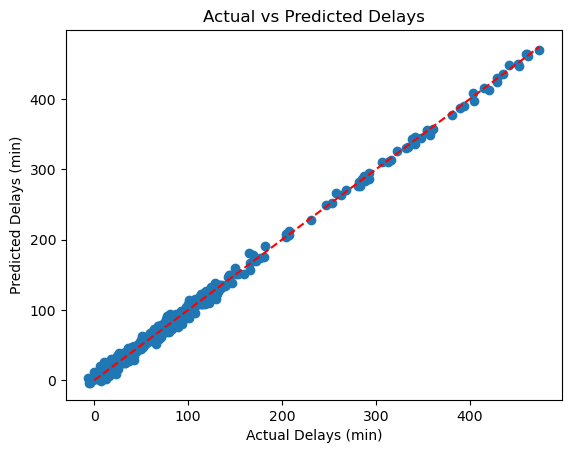

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Load your dataset
# Replace 'train_delay_data.csv' with your actual dataset file
data = pd.read_csv("C:\\Users\\hp\\Downloads\\train delay data.csv")

# Display the first few rows of the dataset
print(data.head())
# Print the column names of the DataFrame
print(data.columns)
np.random.seed(42)  # For reproducibility
data['Delay (min)'] = (data['Distance Between Stations (km)'] * 0.5 +
                       np.random.normal(0, 5, len(data)))  # Adding random noise

# Features and target variable
X = data.drop('Delay (min)', axis=1)  # Feature variables
y = data['Delay (min)']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_cols = ['Distance Between Stations (km)', 'Historical Delay (min)']
categorical_cols = ['Weather Conditions', 'Day of the Week', 'Time of Day', 'Train Type', 'Route Congestion']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a pipeline with preprocessor and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Delays (min)')
plt.ylabel('Predicted Delays (min)')
plt.title('Actual vs Predicted Delays')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')  # Diagonal line
plt.show()

   Distance Between Stations (km) Weather Conditions Day of the Week  \
0                             100              Clear          Monday   
1                             150              Rainy         Tuesday   
2                             200              Foggy       Wednesday   
3                              50              Clear        Thursday   
4                              75              Rainy          Friday   

  Time of Day Train Type  Historical Delay (min) Route Congestion  
0     Morning    Express                       5              Low  
1   Afternoon  Superfast                      10           Medium  
2     Evening      Local                      15             High  
3       Night    Express                       2              Low  
4     Morning  Superfast                       8           Medium  
Index(['Distance Between Stations (km)', 'Weather Conditions',
       'Day of the Week', 'Time of Day', 'Train Type',
       'Historical Delay (min)', 'Route C

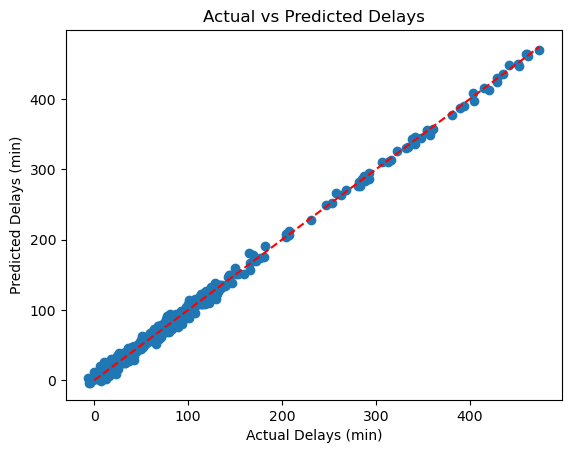

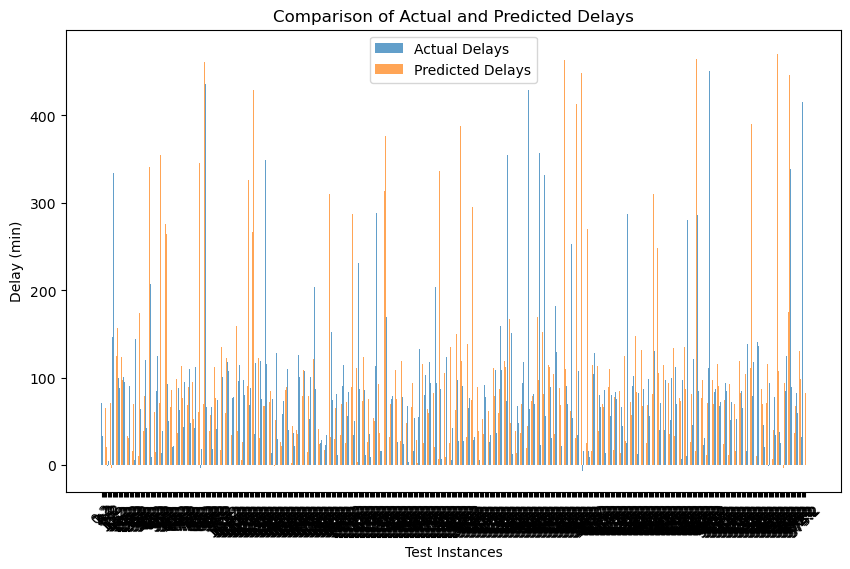

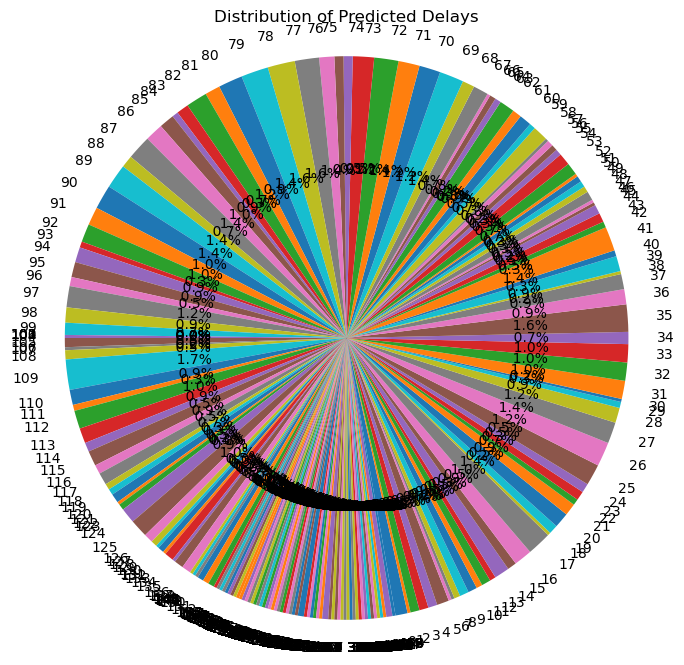

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Load your dataset
# Replace 'train_delay_data.csv' with your actual dataset file
data = pd.read_csv("C:\\Users\\hp\\Downloads\\train delay data.csv")

# Display the first few rows of the dataset
print(data.head())
# Print the column names of the DataFrame
print(data.columns)
np.random.seed(42)  # For reproducibility
data['Delay (min)'] = (data['Distance Between Stations (km)'] * 0.5 +
                       np.random.normal(0, 5, len(data)))  # Adding random noise

# Features and target variable
X = data.drop('Delay (min)', axis=1)  # Feature variables
y = data['Delay (min)']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_cols = ['Distance Between Stations (km)', 'Historical Delay (min)']
categorical_cols = ['Weather Conditions', 'Day of the Week', 'Time of Day', 'Train Type', 'Route Congestion']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a pipeline with preprocessor and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Delays (min)')
plt.ylabel('Predicted Delays (min)')
plt.title('Actual vs Predicted Delays')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')  # Diagonal line
plt.show()

# Bar Plot of Actual vs Predicted Delays
plt.figure(figsize=(10, 6))
bar_width = 0.35
indices = np.arange(len(y_test))

# Plotting actual and predicted values
plt.bar(indices, y_test, bar_width, label='Actual Delays', alpha=0.7)
plt.bar(indices + bar_width, y_pred, bar_width, label='Predicted Delays', alpha=0.7)

plt.xlabel('Test Instances')
plt.ylabel('Delay (min)')
plt.title('Comparison of Actual and Predicted Delays')
plt.legend()
plt.xticks(indices + bar_width / 2, rotation=45)
plt.show()
# Pie Chart of the predicted delays distribution
plt.figure(figsize=(8, 8))

# Ensure no negative predictions and round the values
y_pred_rounded = np.clip(np.round(y_pred).astype(int), 0, None)  # Clip to prevent negatives
# Use np.bincount to count occurrences of unique rounded predicted delays
predicted_counts = np.bincount(y_pred_rounded, minlength=20)  # Adjust minlength based on your context
labels = [str(i) for i in range(len(predicted_counts))]

plt.pie(predicted_counts, labels=labels, autopct='%10.1f%%', startangle=1000000)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Predicted Delays')
plt.show()


In [3]:
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16  #Import all the necessary modules
import matplotlib.pyplot as plot
from glob import glob

IMAGESHAPE = [224, 224, 3] #Provide image size as 224 x 224 this is a fixed-size for VGG16 architecture
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)
#3 signifies that we are working with RGB type of images.
training_data = 'chest_xray/train'
testing_data = 'chest_xray/test' #Give our training and testing path

for each_layer in vgg_model.layers:
    each_layer.trainable = False #Set the trainable as False, So that all the layers would not be trained.
classes = glob('chest_xray/train/*') #Finding how many classes present in our train dataset.
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(len(classes), activation='softmax')(flatten_layer)
final_model = Model(inputs=vgg_model.input, outputs=prediction) #Combine the VGG output and prediction , this all together will create a model.
final_model.summary() #Displaying the summary
final_model.compile( #Compiling our model using adam optimizer and optimization metric as accuracy.
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, #importing our dataset to keras using ImageDataGenerator in keras.
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale =1. / 255)
training_set = train_datagen.flow_from_directory("C:\\Users\\hp\\Downloads\\archive (4)\\chest_xray", #inserting the images.
                                                 target_size = (224, 224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')
test_set = testing_datagen.flow_from_directory("C:\\Users\\hp\\Downloads\\archive (4)\\chest_xray\\test",
                                               target_size = (224, 224),
                                               batch_size = 4,
                                               class_mode = 'categorical')
fitted_model = final_model.fit( #Fitting the model.
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
plot.plot(fitted_model.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(fitted_model.history['val_loss'], label='validation loss')
plot.legend()
plot.show()
plot.savefig('LossVal_loss')
plot.plot(fitted_model.history['acc'], label='training accuracy')
plot.plot(fitted_model.history['val_acc'], label='validation accuracy')
plot.legend()
plot.show()
plot.savefig('AccVal_acc')
final_model.save('our_model.h5') #Saving the model file.
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('our_model.h5') #Loading our model
img=image.load_img('/content/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg',target_size=(224,224))
imagee=image.img_to_array(img) #Converting the X-Ray into pixels
imagee=np.expand_dims(imagee, axis=0)
img_data=preprocess_input(imagee)
prediction=model.predict(img_data)
if prediction[0][0]>prediction[0][1]:  #Printing the prediction of model.
    print('Person is safe.')
else:
    print('Person is affected with Pneumonia.')
print(f'Predictions: {prediction}')


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 0)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 5856 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 0)

In [ ]:
import random

def initialize_3d_board():
    """Create a 4x4x4 3D Tic-Tac-Toe board."""
    return [[[" " for _ in range(4)] for _ in range(4)] for _ in range(4)]

def display_3d_board(board):
    """Display the 3D board layer by layer."""
    print("\nCurrent board (layer by layer):")
    for layer_index, layer in enumerate(board):
        print(f"Layer {layer_index + 1}:")
        for row in layer:
            print(" | ".join(row))
            print("-" * 13)

def check_winner_3d(board):
    """Check if there's a winner in 3D Tic-Tac-Toe."""
    for layer in range(4):
        for row in range(4):
            if board[layer][row][0] == board[layer][row][1] == board[layer][row][2] == board[layer][row][3] != " ":
                return board[layer][row][0]
    for layer in range(4):
        for col in range(4):
            if board[layer][0][col] == board[layer][1][col] == board[layer][2][col] == board[layer][3][col] != " ":
                return board[layer][0][col]
    for row in range(4):
        for col in range(4):
            if board[0][row][col] == board[1][row][col] == board[2][row][col] == board[3][row][col] != " ":
                return board[0][row][col]
    # Diagonal within each layer
    for layer in range(4):
        if board[layer][0][0] == board[layer][1][1] == board[layer][2][2] == board[layer][3][3] != " ":
            return board[layer][0][0]
        if board[layer][0][3] == board[layer][1][2] == board[layer][2][1] == board[layer][3][0] != " ":
            return board[layer][0][3]
    # Cross-layer diagonals
    if board[0][0][0] == board[1][1][1] == board[2][2][2] == board[3][3][3] != " ":
        return board[0][0][0]
    if board[0][0][3] == board[1][1][2] == board[2][2][1] == board[3][3][0] != " ":
        return board[0][0][3]
    if board[0][3][0] == board[1][2][1] == board[2][1][2] == board[3][0][3] != " ":
        return board[0][3][0]
    if board[0][3][3] == board[1][2][2] == board[2][1][1] == board[3][0][0] != " ":
        return board[0][3][3]
    # Check for draw
    if all(cell != " " for layer in board for row in layer for cell in row):
        return "Draw"
    return None

def get_best_move(board, player, opponent):
    """Get the best move for the computer."""
    # Check for a winning move
    for layer in range(4):
        for row in range(4):
            for col in range(4):
                if board[layer][row][col] == " ":
                    board[layer][row][col] = player
                    if check_winner_3d(board) == player:
                        board[layer][row][col] = " "
                        return (layer, row, col)
                    board[layer][row][col] = " "
    # Check for a blocking move
    for layer in range(4):
        for row in range(4):
            for col in range(4):
                if board[layer][row][col] == " ":
                    board[layer][row][col] = opponent
                    if check_winner_3d(board) == opponent:
                        board[layer][row][col] = " "
                        return (layer, row, col)
                    board[layer][row][col] = " "
    # Otherwise, return a random move
    empty_squares = [(l, r, c) for l in range(4) for r in range(4) for c in range(4) if board[l][r][c] == " "]
    return random.choice(empty_squares)

def player_vs_computer_3d_tic_tac_toe():
    """Play 3D Tic-Tac-Toe against the computer."""
    board = initialize_3d_board()
    human_player = input("Do you want to be X or O? ").upper()
    computer_player = "O" if human_player == "X" else "X"
    human_turn = input("Do you want to go first? (yes/no): ").strip().lower() == "yes"
    turn = 0

    while True:
        display_3d_board(board)
        current_player = human_player if (human_turn and turn % 2 == 0) or (not human_turn and turn % 2 == 1) else computer_player

        if current_player == human_player:
            print("Your turn.")
            while True:
                try:
                    layer, row, col = map(int, input("Enter layer, row, and column (0-3) separated by spaces: ").split())
                    if board[layer][row][col] == " ":
                        board[layer][row][col] = current_player
                        break
                    else:
                        print("That square is already taken. Try again.")
                except (ValueError, IndexError):
                    print("Invalid input. Enter numbers between 0 and 3.")
        else:
            print("Computer's turn.")
            layer, row, col = get_best_move(board, computer_player, human_player)
            board[layer][row][col] = current_player

        # Check for a winner or draw
        result = check_winner_3d(board)
        if result:
            display_3d_board(board)
            if result == "Draw":
                print("It's a draw!")
            else:
                print(f"{'You win!' if result == human_player else 'Computer wins!'}")
            break

        turn += 1

if __name__ == "__main__":
    player_vs_computer_3d_tic_tac_toe()


Do you want to be X or O?  x
Do you want to go first? (yes/no):  yes



Current board (layer by layer):
Layer 1:
  |   |   |  
-------------
  |   |   |  
-------------
  |   |   |  
-------------
  |   |   |  
-------------
Layer 2:
  |   |   |  
-------------
  |   |   |  
-------------
  |   |   |  
-------------
  |   |   |  
-------------
Layer 3:
  |   |   |  
-------------
  |   |   |  
-------------
  |   |   |  
-------------
  |   |   |  
-------------
Layer 4:
  |   |   |  
-------------
  |   |   |  
-------------
  |   |   |  
-------------
  |   |   |  
-------------
Your turn.


Enter layer, row, and column (0-3) separated by spaces:  0 2


Invalid input. Enter numbers between 0 and 3.


Enter layer, row, and column (0-3) separated by spaces:  1 2


Invalid input. Enter numbers between 0 and 3.


Enter layer, row, and column (0-3) separated by spaces:  0 3


Invalid input. Enter numbers between 0 and 3.


Enter layer, row, and column (0-3) separated by spaces:  2


Invalid input. Enter numbers between 0 and 3.


Enter layer, row, and column (0-3) separated by spaces:  1 0


Invalid input. Enter numbers between 0 and 3.


Enter layer, row, and column (0-3) separated by spaces:  0 8


Invalid input. Enter numbers between 0 and 3.


Enter layer, row, and column (0-3) separated by spaces:  0 3


Invalid input. Enter numbers between 0 and 3.


Enter layer, row, and column (0-3) separated by spaces:  0 1 2 3


Invalid input. Enter numbers between 0 and 3.


In [3]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pytrends.request import TrendReq
pytrends=TrendReq()
region=input("Enter the region:")
trending=pytrends.trending_searches(pn=region)
print(trending)

Enter the region: germany


                                0
0       Beliebteste Vornamen 2024
1             Silvester-Feuerwerk
2          Skispringen Oberstdorf
3                      Pietreczko
4   Flugzeugabsturz in Kasachstan
5                      Squid Game
6             Vierschanzentournee
7                 Oh Du fröhliche
8                     Nachrichten
9                       Magdeburg
10                            MDR
11                Vertrauensfrage
12                 Rolf Zuckowski
13                        Mayotte
14              Weiße Weihnachten
15                     Hertha BSC
16                    Mario Voigt
17                  Europa League
18                 Lars Windhorst
19          UEFA Champions League


In [3]:
pip install pyfiglet

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB 435.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.1 MB 653.6 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.1 MB 919.0 kB/s eta 0:00:02
   ---------- ----------------------------- 0.3/1.1 MB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 0.5/1.1 MB 2.0 MB/s eta 0:00:01
   --------------------------------- ------ 0.9/1.1 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from colorama import Fore  # Correct import
import pyfiglet

# Create the text with the pyfiglet font
font = pyfiglet.figlet_format('Merry Christmas')

# Print the text in red
print(Fore.RED + font)


 __  __                         ____ _          _     _                       
|  \/  | ___ _ __ _ __ _   _   / ___| |__  _ __(_)___| |_ _ __ ___   __ _ ___ 
| |\/| |/ _ \ '__| '__| | | | | |   | '_ \| '__| / __| __| '_ ` _ \ / _` / __|
| |  | |  __/ |  | |  | |_| | | |___| | | | |  | \__ \ |_| | | | | | (_| \__ \
|_|  |_|\___|_|  |_|   \__, |  \____|_| |_|_|  |_|___/\__|_| |_| |_|\__,_|___/
                       |___/                                                  



In [2]:
from colorama import Fore  # Correct import
import pyfiglet

# Create the text with the pyfiglet font
font = pyfiglet.figlet_format('Happy New Year 2025')

# Print the text in red
print(Fore.RED + font)


 _   _                           _   _                __   __              
| | | | __ _ _ __  _ __  _   _  | \ | | _____      __ \ \ / /__  __ _ _ __ 
| |_| |/ _` | '_ \| '_ \| | | | |  \| |/ _ \ \ /\ / /  \ V / _ \/ _` | '__|
|  _  | (_| | |_) | |_) | |_| | | |\  |  __/\ V  V /    | |  __/ (_| | |   
|_| |_|\__,_| .__/| .__/ \__, | |_| \_|\___| \_/\_/     |_|\___|\__,_|_|   
            |_|   |_|    |___/                                             
 ____   ___ ____  ____  
|___ \ / _ \___ \| ___| 
  __) | | | |__) |___ \ 
 / __/| |_| / __/ ___) |
|_____|\___/_____|____/ 
                        



In [5]:
pip install pyfiglet termcolor

Note: you may need to restart the kernel to use updated packages.


In [1]:
import random
from pyfiglet import Figlet
from termcolor import colored

TEXT = "Happy New Year 2025"
COLOR_LIST = ['red', 'green', 'blue', 'yellow']

with open('texts.txt') as f:
    font_list = [line.strip() for line in f]

figlet = Figlet()
for _ in range(1):
    random_font = random.choice(font_list)
    random_color = random.choice(COLOR_LIST)
    figlet.setFont(font=random_font)
    text_art = colored(figlet.renderText(TEXT), random_color)
    print("\n", text_art)


FileNotFoundError: [Errno 2] No such file or directory: 'texts.txt'

In [2]:
import numpy as np

x = np.arange(7, 16)
y = np.arange(1, 18, 2)
z = np.column_stack((x[::-1], y))

for i, j in z:
    print(' ' * i + '*' * j)

for r in range(3):
    print(' ' * 13, '||')

print(' ' * 12, end='\\=====/')
print('')


               *
              ***
             *****
            *******
           *********
          ***********
         *************
        ***************
       *****************
              ||
              ||
              ||
            \=====/


In [8]:
pip install basemap


     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     ------------- ------------------------ 20.5/56.0 kB 330.3 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/56.0 kB 393.8 kB/s eta 0:00:01
     ---------------------------------- --- 51.2/56.0 kB 292.6 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 244.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/507.3 kB ? eta -:--:--
   ---- ----------------------------------- 51.2/507.3 kB 2.6 MB/s eta 0:00:01
   ---------- ----------------------------- 133.1/507.3 kB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 184.3/507.3 kB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 245.8/507.3 kB 1.5 MB/s eta 0:00:01
   --------------------------- ------------ 348.2/507.3 kB 1.5 MB/s eta 0:00:01
   --------------------------------- ------ 430.1/507.3 kB 1.5 MB

In [9]:
pip install cartopy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 487.6 kB/s eta 0:00:23
    --------------------------------------- 0.2/11.0 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.3/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.0 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.0 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.0 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.0 MB 3.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.0 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.0 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.0 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.0 MB 3.3 MB/s eta 0:00:03
   ----- --

D:\biswanath\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip

D:\biswanath\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip

D:\biswanath\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip

D:\biswanath\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip



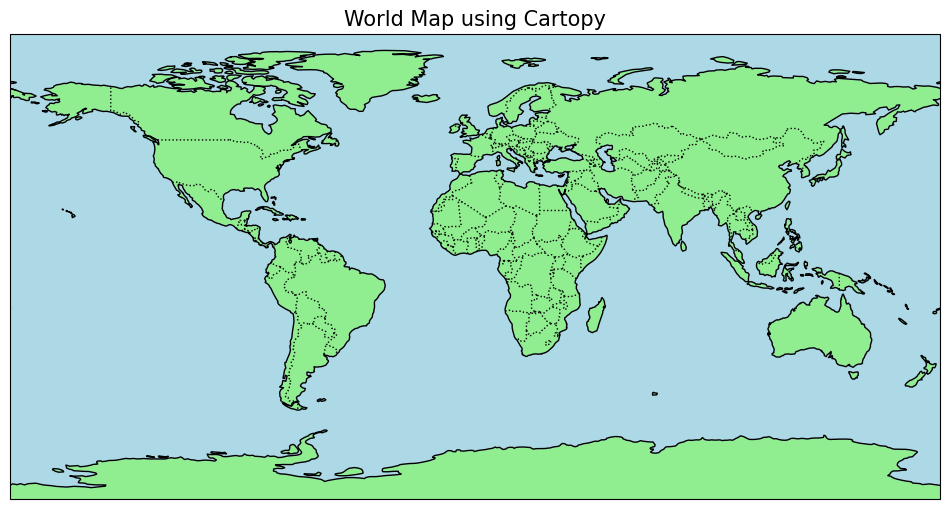

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Add features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgreen')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Title
plt.title("World Map using Cartopy", fontsize=15)
plt.show()


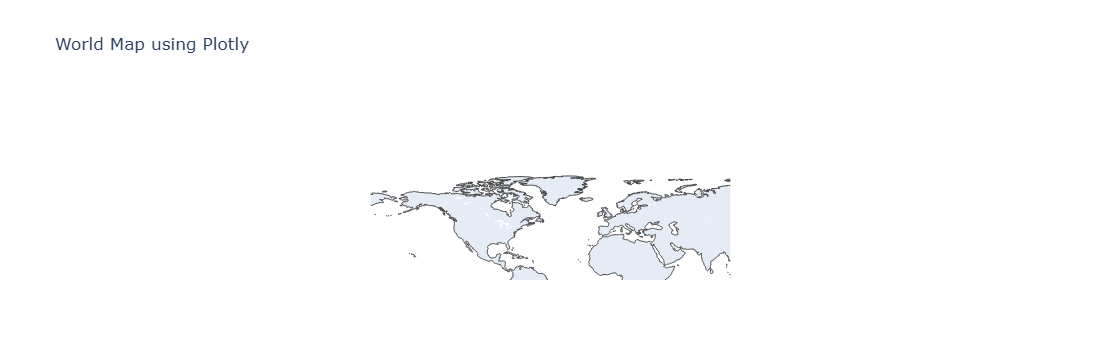

In [4]:
import plotly.express as px

# Create a world map
fig = px.choropleth(locationmode="country names", 
                    title="Interactive World Map")
fig.update_layout(title="World Map using Plotly", 
                  geo=dict(showframe=False, projection_type='equirectangular'))

# Display the map
fig.show()


In [6]:
pip install folium

   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.1 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.1 kB 325.1 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.1 kB 544.7 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/110.1 kB 491.5 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/110.1 kB 491.5 kB/s eta 0:00:01
   -------------------------------- ------ 92.2/110.1 kB 327.7 kB/s eta 0:00:01
   -------------------------------------- 110.1/110.1 kB 319.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import folium
import webbrowser

# Create map and add markers
world_map = folium.Map(location=[0, 0], zoom_start=2)
folium.Marker([48.8566, 2.3522], popup="Paris, France").add_to(world_map)
folium.Marker([40.7128, -74.0060], popup="New York, USA").add_to(world_map)

# Save map to HTML file
world_map.save("world_map.html")

# Open the HTML file in the default web browser
webbrowser.open("world_map.html")


True

In [8]:
pip install numpy opencv-python opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB 435.7 kB/s eta 0:01:46
   ---------------------------------------- 0.0/46.2 MB 435.7 kB/s eta 0:01:46
   ---------------------------------------- 0.0/46.2 MB 435.7 kB/s eta 0:01:46
   ---------------------------------------- 0.0/46.2 MB 435.7 kB/s eta 0:01:46
   ---------------------------------------- 0.0/46.2 MB 435.7 kB/s eta 0:01:46
   ---------------------------------------- 0.1/46.2 MB 275.8 kB/s eta 0:02:48
   ---------------------------------------- 0.1/46.2 MB 312.2 kB/s eta 0:02:28
   ---------------------------------------- 0.1/46.2 MB 312.2 kB/s eta 0:02:28
   ---------------------------------------- 0.1/46.2 MB 312.2 kB/s eta 0:02:28
   ---------------------------------------- 0.1/46.2 MB 312.2 kB/s eta 0:02:28
   ---------------------------------------- 0.1/46.2 MB 312.2 kB/s eta

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\biswanath\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
import os
import sys
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

# Function to calculate speed
def calculate_speed(p1, p2, fps, scale):
    distance = np.linalg.norm(np.array(p2) - np.array(p1))  # Pixel distance
    real_distance = distance * scale  # Convert to real-world units
    speed = real_distance * fps * 3.6  # Convert to km/h
    return speed

# Initialize video capture
video_path = "video.mp4"  # Path to your video file
cap = cv2.VideoCapture(video_path)

# Get video FPS and resolution
fps = int(cap.get(cv2.CAP_PROP_FPS))
scale = 0.05  # meters per pixel (adjust for your setup)

# Initialize background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

# Store vehicle positions
vehicle_positions = {}

# Visualization setup
plt.ion()  # Interactive mode for live updating plots

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    fgmask = fgbg.apply(blurred)

    # Remove noise and shadows
    _, thresh = cv2.threshold(fgmask, 200, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    clean_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Detect contours
    contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw on frame
    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue

        x, y, w, h = cv2.boundingRect(contour)
        center = (x + w // 2, y + h // 2)

        # Track vehicle
        if center not in vehicle_positions:
            vehicle_positions[center] = [time.time()]
        else:
            vehicle_positions[center].append(time.time())
            if len(vehicle_positions[center]) >= 2:
                speed = calculate_speed(vehicle_positions[center][-2], center, fps, scale)
                cv2.putText(frame, f"{speed:.2f} km/h", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Draw bounding box and center
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.circle(frame, center, 5, (0, 0, 255), -1)

    # Display frame using Matplotlib
    plt.clf()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.pause(0.01)

cap.release()
plt.ioff()
plt.show()


In [2]:
!pip install opencv-contrib-python


   ---------------------------------------- 0.0/46.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.5 MB ? eta -:--:--
    --------------------------------------- 1.0/46.5 MB 3.3 MB/s eta 0:00:14
   - -------------------------------------- 1.8/46.5 MB 3.1 MB/s eta 0:00:15
   -- ------------------------------------- 2.4/46.5 MB 3.0 MB/s eta 0:00:15
   -- ------------------------------------- 2.9/46.5 MB 3.0 MB/s eta 0:00:15
   --- ------------------------------------ 3.7/46.5 MB 3.1 MB/s eta 0:00:14
   --- ------------------------------------ 4.2/46.5 MB 2.9 MB/s eta 0:00:15
   ---- ----------------------------------- 5.0/46.5 MB 3.1 MB/s eta 0:00:14
   ---- ----------------------------------- 5.8/46.5 MB 3.1 MB/s eta 0:00:14
   ----- ---------------------------------- 6.6/46.5 MB 3.2 MB/s eta 0:00:13
   ------ --------------------------------- 7.6/46.5 MB 3.3 MB/s eta 0:00:12
   ------ --------------------------------- 8.1/46.5 MB 3.2 MB/s eta 0:00:12
   ------- --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
basemap 1.4.1 requires numpy<1.27,>=1.21; python_version >= "3.8", but you have numpy 2.4.1 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.4.1 which is incompatible.


In [1]:
import cv2
import numpy as np
import time

def calculate_speed(p1, p2, fps, scale):
    distance = np.linalg.norm(np.array(p2) - np.array(p1))
    real_distance = distance * scale
    speed = real_distance * fps * 3.6
    return speed

video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

fps = int(cap.get(cv2.CAP_PROP_FPS))
scale = 0.05

fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)
vehicle_positions = {}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    fgmask = fgbg.apply(blurred)

    thresh = cv2.threshold(fgmask, 200, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    clean_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue

        x, y, w, h = cv2.boundingRect(contour)
        center = (x + w // 2, y + h // 2)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.circle(frame, center, 5, (0, 0, 255), -1)

        if center not in vehicle_positions:
            vehicle_positions[center] = [time.time()]
        else:
            vehicle_positions[center].append(time.time())
            if len(vehicle_positions[center]) >= 2:
                t1, t2 = vehicle_positions[center][-2:]
                speed = calculate_speed(vehicle_positions[center][-2], center, fps, scale)
                cv2.putText(frame, f"{speed:.2f} km/h", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    cv2.imshow("Vehicle Speed Estimation", frame)

    # Ensure the display updates
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [9]:
pip install numpy matplotlib opencv-python


Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_speed(p1, p2, fps, scale):
    distance = np.linalg.norm(np.array(p2) - np.array(p1))
    real_distance = distance * scale
    speed = real_distance * fps * 3.6  # Convert m/s to km/h
    return speed

# Path to the video file
video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)
video_path = r"C:\\Users\\YourName\\Videos\\example.mp4"


if not cap.isOpened():
    print("Error: Cannot open video file.")
    exit()

fps = int(cap.get(cv2.CAP_PROP_FPS))
scale = 0.05  # Adjust as per your setup

fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)
vehicle_positions = {}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or cannot read frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    fgmask = fgbg.apply(blurred)

    _, thresh = cv2.threshold(fgmask, 200, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    clean_mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue

        x, y, w, h = cv2.boundingRect(contour)
        center = (x + w // 2, y + h // 2)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.circle(frame, center, 5, (0, 0, 255), -1)

        if center not in vehicle_positions:
            vehicle_positions[center] = [time.time()]
        else:
            vehicle_positions[center].append(time.time())
            if len(vehicle_positions[center]) >= 2:
                t1, t2 = vehicle_positions[center][-2:]
                speed = calculate_speed(vehicle_positions[center][-2], center, fps, scale)
                cv2.putText(frame, f"{speed:.2f} km/h", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display using matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # To stop, press 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Error: Cannot open video file.


In [2]:
import cv2
cap = cv2.VideoCapture(0)  # 0 for default webcam
if not cap.isOpened():
    print("Error: Cannot access the webcam.")
else:
    print("Webcam accessed successfully.")


Webcam accessed successfully.


In [ ]:
from datetime import datetime
import time
new_year=datetime(datetime.now().year
                  + 1, 1, 1)
while datetime.now() < new_year:

    remaining = new_year - datetime.now()

    print(f"\rTime left: {remaining}", end="")

    time.sleep(1)

print("\n🎆🎉 Happy New Year! 🎉🎆")

Time left: 336 days, 3:48:39.261189

In [ ]:
import tkinter as tk
from datetime import datetime, timedelta
import time
import threading

# Function to update the countdown
def update_countdown():
    new_year = datetime(datetime.now().year + 1, 1, 1)
    while True:
        now = datetime.now()
        remaining_time = new_year - now
        
        if remaining_time.total_seconds() <= 0:
            countdown_label.config(text="Happy New Year!")
            break

        days, remainder = divmod(remaining_time.total_seconds(), 86400)
        hours, remainder = divmod(remainder, 3600)
        minutes, seconds = divmod(remainder, 60)

        countdown_label.config(
            text=f"{int(days)}d {int(hours)}h {int(minutes)}m {int(seconds)}s"
        )
        time.sleep(1)

# Celebration message function
def show_celebration():
    root.config(bg="gold")
    celebration_label = tk.Label(
        root, text="🎉 Happy New Year! 🎉", font=("Arial", 24, "bold"), bg="gold"
    )
    celebration_label.pack()

# Run the countdown in a separate thread
def start_countdown():
    threading.Thread(target=update_countdown).start()

# GUI setup
root = tk.Tk()
root.title("New Year Countdown")
root.geometry("400x300")

title_label = tk.Label(root, text="New Year Countdown", font=("Arial", 20))
title_label.pack(pady=20)

countdown_label = tk.Label(root, text="", font=("Arial", 18))
countdown_label.pack(pady=20)

start_button = tk.Button(root, text="Start Countdown", command=start_countdown)
start_button.pack(pady=10)

root.mainloop()


In [1]:
import tkinter as tk
from tkinter import messagebox
import time
from threading import Thread

def start_countdown():
    try:
        seconds = int(entry_seconds.get())
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter a valid number of seconds.")
        return

    def countdown():
        for i in range(seconds, -1, -1):
            time_str = f"Time left: {i} seconds"
            countdown_label.config(text=time_str)
            time.sleep(1)
        countdown_label.config(text="Happy New Year 2025!")

    Thread(target=countdown, daemon=True).start()

def display_wishes():
    name = name_entry.get()
    if name.strip():
        wishes_label.config(text=f"Best wishes for the New Year, {name}! 🎉")
    else:
        wishes_label.config(text="Best wishes for the New Year! 🎉")

# Create the main application window
app = tk.Tk()
app.title("Happy New Year Countdown 2025")
app.geometry("400x300")

# Name Entry
name_label = tk.Label(app, text="Enter your name:", font=("Arial", 12))
name_label.pack(pady=5)
name_entry = tk.Entry(app, font=("Arial", 12))
name_entry.pack(pady=5)

# Best Wishes Button
wishes_button = tk.Button(app, text="Show Best Wishes", font=("Arial", 12), command=display_wishes)
wishes_button.pack(pady=5)

# Wishes Label
wishes_label = tk.Label(app, text="", font=("Arial", 14), fg="blue")
wishes_label.pack(pady=10)

# Countdown Entry
countdown_label = tk.Label(app, text="Enter countdown seconds:", font=("Arial", 12))
countdown_label.pack(pady=5)
entry_seconds = tk.Entry(app, font=("Arial", 12))
entry_seconds.pack(pady=5)

# Start Countdown Button
start_button = tk.Button(app, text="Start Countdown", font=("Arial", 12), command=start_countdown)
start_button.pack(pady=5)

# Countdown Display Label
countdown_label = tk.Label(app, text="", font=("Arial", 14), fg="red")
countdown_label.pack(pady=10)

# Run the application
app.mainloop()


In [1]:
pip install rich

Note: you may need to restart the kernel to use updated packages.


In [1]:
from rich.table import Table
from rich.console import Console

# Create a console object for output
console = Console()

# Create a table object with a title
table = Table(title="User Data")

# Add columns to the table
table.add_column("ID", justify="right", style="cyan", no_wrap=True)
table.add_column("Name", style="magenta")
table.add_column("Age", justify="right", style="green")

# Add rows to the table
table.add_row("1", "Alice", "28")
table.add_row("2", "Bob", "32")
table.add_row("3", "Charlie", "22")

# Print the table to the console
console.print(table)


      User Data       
┏━━━━┳━━━━━━━━━┳━━━━━┓
┃ ID ┃ Name    ┃ Age ┃
┡━━━━╇━━━━━━━━━╇━━━━━┩
│  1 │ Alice   │  28 │
│  2 │ Bob     │  32 │
│  3 │ Charlie │  22 │
└────┴─────────┴─────┘

In [2]:
import calendar
from rich.console import Console
from rich.table import Table

def colorful_calendar(year):
    console = Console()
    months = [calendar.monthcalendar(year, m) for m in range(1, 13)]
    
    for month in range(12):
        month_name = calendar.month_name[month + 1]
        table = Table(title=f"[bold cyan]{month_name} {year}[/bold cyan]", show_lines=True)
        
        # Add columns for each day of the week
        table.add_column("Mon", justify="center", style="green")
        table.add_column("Tue", justify="center", style="green")
        table.add_column("Wed", justify="center", style="green")
        table.add_column("Thu", justify="center", style="green")
        table.add_column("Fri", justify="center", style="green")
        table.add_column("Sat", justify="center", style="green")
        table.add_column("Sun", justify="center", style="red")
        
        # Populate the table with the days of the month
        for week in months[month]:
            table.add_row(*[str(day) if day != 0 else "" for day in week])
        
        # Print the table for the current month
        console.print(table)
        console.print("\n")

# Call the function with the desired year
colorful_calendar(2025)
colorful_calendar(2026)


               January 2025                
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │  1  │  2  │  3  │  4  │  5  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  6  │  7  │  8  │  9  │ 10  │ 11  │ 12  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 13  │ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 20  │ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 27  │ 28  │ 29  │ 30  │ 31  │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               February 2025               
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │     │  1  │  2  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  3  │  4  │  5  │  6  │  7  │  8  │  9  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │ 16  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 17  │ 18  │ 19  │ 20  │ 21  │ 22  │ 23  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 24  │ 25  │ 26  │ 27  │ 28  │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                March 2025                 
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │     │  1  │  2  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  3  │  4  │  5  │  6  │  7  │  8  │  9  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │ 16  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 17  │ 18  │ 19  │ 20  │ 21  │ 22  │ 23  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 24  │ 25  │ 26  │ 27  │ 28  │ 29  │ 30  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 31  │     │     │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                April 2025                 
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │  1  │  2  │  3  │  4  │  5  │  6  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  7  │  8  │  9  │ 10  │ 11  │ 12  │ 13  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │ 20  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │ 27  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 28  │ 29  │ 30  │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                 May 2025                  
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │  1  │  2  │  3  │  4  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  5  │  6  │  7  │  8  │  9  │ 10  │ 11  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 12  │ 13  │ 14  │ 15  │ 16  │ 17  │ 18  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 19  │ 20  │ 21  │ 22  │ 23  │ 24  │ 25  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 26  │ 27  │ 28  │ 29  │ 30  │ 31  │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                 June 2025                 
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │     │     │  1  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  2  │  3  │  4  │  5  │  6  │  7  │  8  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  9  │ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 16  │ 17  │ 18  │ 19  │ 20  │ 21  │ 22  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 23  │ 24  │ 25  │ 26  │ 27  │ 28  │ 29  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 30  │     │     │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                 July 2025                 
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │  1  │  2  │  3  │  4  │  5  │  6  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  7  │  8  │  9  │ 10  │ 11  │ 12  │ 13  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │ 20  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │ 27  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 28  │ 29  │ 30  │ 31  │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                August 2025                
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │  1  │  2  │  3  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  4  │  5  │  6  │  7  │  8  │  9  │ 10  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 11  │ 12  │ 13  │ 14  │ 15  │ 16  │ 17  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 18  │ 19  │ 20  │ 21  │ 22  │ 23  │ 24  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 25  │ 26  │ 27  │ 28  │ 29  │ 30  │ 31  │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

              September 2025               
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│  1  │  2  │  3  │  4  │  5  │  6  │  7  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  8  │  9  │ 10  │ 11  │ 12  │ 13  │ 14  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 15  │ 16  │ 17  │ 18  │ 19  │ 20  │ 21  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 22  │ 23  │ 24  │ 25  │ 26  │ 27  │ 28  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 29  │ 30  │     │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               October 2025                
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │  1  │  2  │  3  │  4  │  5  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  6  │  7  │  8  │  9  │ 10  │ 11  │ 12  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 13  │ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 20  │ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 27  │ 28  │ 29  │ 30  │ 31  │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               November 2025               
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │     │  1  │  2  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  3  │  4  │  5  │  6  │  7  │  8  │  9  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │ 16  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 17  │ 18  │ 19  │ 20  │ 21  │ 22  │ 23  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 24  │ 25  │ 26  │ 27  │ 28  │ 29  │ 30  │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               December 2025               
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│  1  │  2  │  3  │  4  │  5  │  6  │  7  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  8  │  9  │ 10  │ 11  │ 12  │ 13  │ 14  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 15  │ 16  │ 17  │ 18  │ 19  │ 20  │ 21  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 22  │ 23  │ 24  │ 25  │ 26  │ 27  │ 28  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 29  │ 30  │ 31  │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               January 2026                
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │  1  │  2  │  3  │  4  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  5  │  6  │  7  │  8  │  9  │ 10  │ 11  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 12  │ 13  │ 14  │ 15  │ 16  │ 17  │ 18  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 19  │ 20  │ 21  │ 22  │ 23  │ 24  │ 25  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 26  │ 27  │ 28  │ 29  │ 30  │ 31  │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               February 2026               
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │     │     │  1  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  2  │  3  │  4  │  5  │  6  │  7  │  8  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  9  │ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 16  │ 17  │ 18  │ 19  │ 20  │ 21  │ 22  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 23  │ 24  │ 25  │ 26  │ 27  │ 28  │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                March 2026                 
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │     │     │  1  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  2  │  3  │  4  │  5  │  6  │  7  │  8  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  9  │ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 16  │ 17  │ 18  │ 19  │ 20  │ 21  │ 22  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 23  │ 24  │ 25  │ 26  │ 27  │ 28  │ 29  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 30  │ 31  │     │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                April 2026                 
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │  1  │  2  │  3  │  4  │  5  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  6  │  7  │  8  │  9  │ 10  │ 11  │ 12  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 13  │ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 20  │ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 27  │ 28  │ 29  │ 30  │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                 May 2026                  
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │  1  │  2  │  3  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  4  │  5  │  6  │  7  │  8  │  9  │ 10  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 11  │ 12  │ 13  │ 14  │ 15  │ 16  │ 17  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 18  │ 19  │ 20  │ 21  │ 22  │ 23  │ 24  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 25  │ 26  │ 27  │ 28  │ 29  │ 30  │ 31  │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                 June 2026                 
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│  1  │  2  │  3  │  4  │  5  │  6  │  7  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  8  │  9  │ 10  │ 11  │ 12  │ 13  │ 14  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 15  │ 16  │ 17  │ 18  │ 19  │ 20  │ 21  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 22  │ 23  │ 24  │ 25  │ 26  │ 27  │ 28  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 29  │ 30  │     │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                 July 2026                 
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │  1  │  2  │  3  │  4  │  5  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  6  │  7  │  8  │  9  │ 10  │ 11  │ 12  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 13  │ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 20  │ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 27  │ 28  │ 29  │ 30  │ 31  │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

                August 2026                
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │     │  1  │  2  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  3  │  4  │  5  │  6  │  7  │  8  │  9  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │ 16  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 17  │ 18  │ 19  │ 20  │ 21  │ 22  │ 23  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 24  │ 25  │ 26  │ 27  │ 28  │ 29  │ 30  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 31  │     │     │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

              September 2026               
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │  1  │  2  │  3  │  4  │  5  │  6  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  7  │  8  │  9  │ 10  │ 11  │ 12  │ 13  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │ 20  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │ 27  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 28  │ 29  │ 30  │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               October 2026                
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │  1  │  2  │  3  │  4  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  5  │  6  │  7  │  8  │  9  │ 10  │ 11  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 12  │ 13  │ 14  │ 15  │ 16  │ 17  │ 18  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 19  │ 20  │ 21  │ 22  │ 23  │ 24  │ 25  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 26  │ 27  │ 28  │ 29  │ 30  │ 31  │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               November 2026               
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │     │     │     │     │     │  1  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  2  │  3  │  4  │  5  │  6  │  7  │  8  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  9  │ 10  │ 11  │ 12  │ 13  │ 14  │ 15  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 16  │ 17  │ 18  │ 19  │ 20  │ 21  │ 22  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 23  │ 24  │ 25  │ 26  │ 27  │ 28  │ 29  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 30  │     │     │     │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

               December 2026               
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ Mon ┃ Tue ┃ Wed ┃ Thu ┃ Fri ┃ Sat ┃ Sun ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│     │  1  │  2  │  3  │  4  │  5  │  6  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  7  │  8  │  9  │ 10  │ 11  │ 12  │ 13  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 14  │ 15  │ 16  │ 17  │ 18  │ 19  │ 20  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 21  │ 22  │ 23  │ 24  │ 25  │ 26  │ 27  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ 28  │ 29  │ 30  │ 31  │     │     │     │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┘

In [5]:
from rich.console import Console
from rich.table import Table

def colorful_train_schedule():
    console = Console()

    # Example train schedule data
    schedule = [
        {"Train": "Express 101", "Departure": "08:00 AM", "Arrival": "10:00 AM", "Route": "City A -> City B", "Status": "On Time"},
        {"Train": "Regional 202", "Departure": "09:30 AM", "Arrival": "12:00 PM", "Route": "City C -> City D", "Status": "Delayed"},
        {"Train": "Fastline 303", "Departure": "01:00 PM", "Arrival": "03:30 PM", "Route": "City E -> City F", "Status": "On Time"},
        {"Train": "Nightline 404", "Departure": "11:00 PM", "Arrival": "04:00 AM", "Route": "City G -> City H", "Status": "Cancelled"},
    ]

    # Create a table with headers
    table = Table(title="[bold cyan]Train Schedule[/bold cyan]", show_lines=True)

    # Add columns
    table.add_column("Train", justify="left", style="yellow")
    table.add_column("Departure", justify="center", style="green")
    table.add_column("Arrival", justify="center", style="green")
    table.add_column("Route", justify="left", style="magenta")
    table.add_column("Status", justify="center", style="bold red")

    # Add rows with train details
    for train in schedule:
        status_color = "bold green" if train["Status"] == "On Time" else "bold red" if train["Status"] == "Cancelled" else "bold yellow"
        table.add_row(
            train["Train"],
            train["Departure"],
            train["Arrival"],
            train["Route"],
            f"[{status_color}]{train['Status']}[/]"
        )

    # Print the table
    console.print(table)

# Call the function
colorful_train_schedule()


                            Train Schedule                             
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Train         ┃ Departure ┃ Arrival  ┃ Route            ┃  Status   ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ Express 101   │ 08:00 AM  │ 10:00 AM │ City A -> City B │  On Time  │
├───────────────┼───────────┼──────────┼──────────────────┼───────────┤
│ Regional 202  │ 09:30 AM  │ 12:00 PM │ City C -> City D │  Delayed  │
├───────────────┼───────────┼──────────┼──────────────────┼───────────┤
│ Fastline 303  │ 01:00 PM  │ 03:30 PM │ City E -> City F │  On Time  │
├───────────────┼───────────┼──────────┼──────────────────┼───────────┤
│ Nightline 404 │ 11:00 PM  │ 04:00 AM │ City G -> City H │ Cancelled │
└───────────────┴───────────┴──────────┴──────────────────┴───────────┘

In [6]:
from rich.console import Console
from rich.table import Table

def colorful_season_table():
    console = Console()

    # Define seasons and their details
    seasons = [
        {"Season": "Winter", "Start Month": "December", "End Month": "February", "Description": "Cold and snowy in many regions."},
        {"Season": "Spring", "Start Month": "March", "End Month": "May", "Description": "Flowers bloom and temperatures rise."},
        {"Season": "Summer", "Start Month": "June", "End Month": "August", "Description": "Hot and sunny, perfect for vacations."},
        {"Season": "Autumn", "Start Month": "September", "End Month": "November", "Description": "Leaves fall and weather cools down."},
    ]

    # Create a table
    table = Table(title="[bold cyan]Seasons of the Year[/bold cyan]", show_lines=True)

    # Add columns
    table.add_column("Season", justify="center", style="bold yellow")
    table.add_column("Start Month", justify="center", style="green")
    table.add_column("End Month", justify="center", style="green")
    table.add_column("Description", justify="left", style="magenta")

    # Add rows for each season
    for season in seasons:
        table.add_row(
            season["Season"],
            season["Start Month"],
            season["End Month"],
            season["Description"]
        )

    # Print the table
    console.print(table)

# Call the function
colorful_season_table()


                            Seasons of the Year                             
┏━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Season ┃ Start Month ┃ End Month ┃ Description                           ┃
┡━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Winter │  December   │ February  │ Cold and snowy in many regions.       │
├────────┼─────────────┼───────────┼───────────────────────────────────────┤
│ Spring │    March    │    May    │ Flowers bloom and temperatures rise.  │
├────────┼─────────────┼───────────┼───────────────────────────────────────┤
│ Summer │    June     │  August   │ Hot and sunny, perfect for vacations. │
├────────┼─────────────┼───────────┼───────────────────────────────────────┤
│ Autumn │  September  │ November  │ Leaves fall and weather cools down.   │
└────────┴─────────────┴───────────┴───────────────────────────────────────┘

In [7]:
from rich.console import Console
from rich.table import Table

def colorful_cricket_players_table():
    console = Console()

    # Example cricket players data
    players = [
        {"Name": "Virat Kohli", "Role": "Batsman", "Team": "India", "Highlight": "Run Machine"},
        {"Name": "Babar Azam", "Role": "Batsman", "Team": "Pakistan", "Highlight": "Elegant Stroke Play"},
        {"Name": "Pat Cummins", "Role": "Bowler", "Team": "Australia", "Highlight": "Fiery Pace"},
        {"Name": "Ben Stokes", "Role": "All-Rounder", "Team": "England", "Highlight": "Match Winner"},
        {"Name": "Rashid Khan", "Role": "Bowler", "Team": "Afghanistan", "Highlight": "Spin Wizard"},
    ]

    # Create a table
    table = Table(title="[bold cyan]Top Cricket Players[/bold cyan]", show_lines=True)

    # Add columns
    table.add_column("Name", justify="left", style="bold yellow")
    table.add_column("Role", justify="center", style="green")
    table.add_column("Team", justify="center", style="magenta")
    table.add_column("Highlight", justify="left", style="bold blue")

    # Add rows for each player
    for player in players:
        table.add_row(
            player["Name"],
            player["Role"],
            player["Team"],
            player["Highlight"]
        )

    # Print the table
    console.print(table)

# Call the function
colorful_cricket_players_table()


                       Top Cricket Players                       
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Name        ┃    Role     ┃    Team     ┃ Highlight           ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ Virat Kohli │   Batsman   │    India    │ Run Machine         │
├─────────────┼─────────────┼─────────────┼─────────────────────┤
│ Babar Azam  │   Batsman   │  Pakistan   │ Elegant Stroke Play │
├─────────────┼─────────────┼─────────────┼─────────────────────┤
│ Pat Cummins │   Bowler    │  Australia  │ Fiery Pace          │
├─────────────┼─────────────┼─────────────┼─────────────────────┤
│ Ben Stokes  │ All-Rounder │   England   │ Match Winner        │
├─────────────┼─────────────┼─────────────┼─────────────────────┤
│ Rashid Khan │   Bowler    │ Afghanistan │ Spin Wizard         │
└─────────────┴─────────────┴─────────────┴─────────────────────┘

In [8]:
from rich.console import Console
from rich.table import Table

def ipl_teams_table():
    console = Console()

    # Define IPL teams and their details
    teams = [
        {"Team Name": "Chennai Super Kings", "Captain": "MS Dhoni", "Home Ground": "MA Chidambaram Stadium, Chennai"},
        {"Team Name": "Mumbai Indians", "Captain": "Rohit Sharma", "Home Ground": "Wankhede Stadium, Mumbai"},
        {"Team Name": "Royal Challengers Bangalore", "Captain": "Faf du Plessis", "Home Ground": "M. Chinnaswamy Stadium, Bangalore"},
        {"Team Name": "Kolkata Knight Riders", "Captain": "Nitish Rana", "Home Ground": "Eden Gardens, Kolkata"},
        {"Team Name": "Delhi Capitals", "Captain": "David Warner", "Home Ground": "Arun Jaitley Stadium, Delhi"},
        {"Team Name": "Punjab Kings", "Captain": "Shikhar Dhawan", "Home Ground": "PCA Stadium, Mohali"},
        {"Team Name": "Rajasthan Royals", "Captain": "Sanju Samson", "Home Ground": "Sawai Mansingh Stadium, Jaipur"},
        {"Team Name": "Sunrisers Hyderabad", "Captain": "Aiden Markram", "Home Ground": "Rajiv Gandhi Intl. Stadium, Hyderabad"},
        {"Team Name": "Lucknow Super Giants", "Captain": "KL Rahul", "Home Ground": "BRSABV Ekana Cricket Stadium, Lucknow"},
        {"Team Name": "Gujarat Titans", "Captain": "Hardik Pandya", "Home Ground": "Narendra Modi Stadium, Ahmedabad"},
    ]

    # Create a table
    table = Table(title="[bold cyan]IPL Cricket Teams[/bold cyan]", show_lines=True)

    # Add columns
    table.add_column("Team Name", justify="left", style="bold yellow")
    table.add_column("Captain", justify="center", style="green")
    table.add_column("Home Ground", justify="left", style="magenta")

    # Add rows for each team
    for team in teams:
        table.add_row(
            team["Team Name"],
            team["Captain"],
            team["Home Ground"]
        )

    # Print the table
    console.print(table)

# Call the function
ipl_teams_table()


                                   IPL Cricket Teams                                    
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Team Name                   ┃    Captain     ┃ Home Ground                           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Chennai Super Kings         │    MS Dhoni    │ MA Chidambaram Stadium, Chennai       │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Mumbai Indians              │  Rohit Sharma  │ Wankhede Stadium, Mumbai              │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Royal Challengers Bangalore │ Faf du Plessis │ M. Chinnaswamy Stadium, Bangalore     │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Kolkata Knight Riders       │  Nitish Rana   │ Eden Gardens, Kolkata                 │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Delhi Capitals              │  David Warner  │ Arun Jaitley Stadium, Delhi           │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Punjab Kings                │ Shikhar Dhawan │ PCA Stadium, Mohali                   │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Rajasthan Royals            │  Sanju Samson  │ Sawai Mansingh Stadium, Jaipur        │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Sunrisers Hyderabad         │ Aiden Markram  │ Rajiv Gandhi Intl. Stadium, Hyderabad │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Lucknow Super Giants        │    KL Rahul    │ BRSABV Ekana Cricket Stadium, Lucknow │
├─────────────────────────────┼────────────────┼───────────────────────────────────────┤
│ Gujarat Titans              │ Hardik Pandya  │ Narendra Modi Stadium, Ahmedabad      │
└─────────────────────────────┴────────────────┴───────────────────────────────────────┘

In [9]:
def print_row(name, organization, role, achievements):
    """Helper function to print a formatted row."""
    print(f"{name:<25} {organization:<25} {role:<20} {achievements:<30}")

def main():
    # Print table header
    print(f"{'Name':<25} {'Organization':<25} {'Role':<20} {'Achievements':<30}")
    print("-" * 100)

    # Print rows with journalist data
    print_row("Satyajit Dash", "Odisha TV", "Reporter", "Best Investigative Journalism 2020")
    print_row("Ananya Mohanty", "The Samaja", "Editor", "Prominent Editorial Contributions")
    print_row("Manoj Kumar", "Kanak News", "Anchor", "Excellence in Live Reporting")
    print_row("Padmini Das", "Pragativadi", "Journalist", "Advocacy for Women's Rights")
    print_row("Bikram Das", "Sambad", "Columnist", "Award-winning Political Analysis")

if __name__ == "__main__":
    main()


Name                      Organization              Role                 Achievements                  
----------------------------------------------------------------------------------------------------
Satyajit Dash             Odisha TV                 Reporter             Best Investigative Journalism 2020
Ananya Mohanty            The Samaja                Editor               Prominent Editorial Contributions
Manoj Kumar               Kanak News                Anchor               Excellence in Live Reporting  
Padmini Das               Pragativadi               Journalist           Advocacy for Women's Rights   
Bikram Das                Sambad                    Columnist            Award-winning Political Analysis


In [10]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [1]:
from tabulate import tabulate

def main():
    # Data: List of festivals by month
    festivals = [
        ["January", "Makar Sankranti", "Harvest festival celebrated with kites and sweets."],
        ["February", "Maha Shivaratri", "Devoted to Lord Shiva with prayers and fasting."],
        ["March", "Holi", "Festival of colors celebrating the arrival of spring."],
        ["April", "Ram Navami", "Celebrates the birth of Lord Rama."],
        ["May", "Buddha Purnima", "Marks the birth, enlightenment, and death of Buddha."],
        ["June", "Rath Yatra", "Chariot festival of Lord Jagannath in Odisha."],
        ["July", "Guru Purnima", "Honoring teachers and spiritual guides."],
        ["August", "Raksha Bandhan", "Celebrates the bond between brothers and sisters."],
        ["September", "Ganesh Chaturthi", "Festival dedicated to Lord Ganesha."],
        ["October", "Dussehra", "Marks the victory of good over evil (Ravana's defeat)."],
        ["November", "Diwali", "Festival of lights celebrating the triumph of light over darkness."],
        ["December", "Christmas", "Celebrates the birth of Jesus Christ."]
    ]

    # Table headers
    headers = ["Month", "Festival", "Description"]

    # Print the table
    print(tabulate(festivals, headers, tablefmt="grid"))

if __name__ == "__main__":
    main()


+-----------+------------------+--------------------------------------------------------------------+
| Month     | Festival         | Description                                                        |
+===========+==================+====================================================================+
| January   | Makar Sankranti  | Harvest festival celebrated with kites and sweets.                 |
+-----------+------------------+--------------------------------------------------------------------+
| February  | Maha Shivaratri  | Devoted to Lord Shiva with prayers and fasting.                    |
+-----------+------------------+--------------------------------------------------------------------+
| March     | Holi             | Festival of colors celebrating the arrival of spring.              |
+-----------+------------------+--------------------------------------------------------------------+
| April     | Ram Navami       | Celebrates the birth of Lord Rama.               

In [6]:
import csv
import os

def export_to_csv():
    # Data: List of festivals by month
    festivals = [
        ["January", "Makar Sankranti", "Harvest festival celebrated with kites and sweets."],
        ["February", "Maha Shivaratri", "Devoted to Lord Shiva with prayers and fasting."],
        ["March", "Holi", "Festival of colors celebrating the arrival of spring."],
        ["April", "Ram Navami", "Celebrates the birth of Lord Rama."],
        ["May", "Buddha Purnima", "Marks the birth, enlightenment, and death of Buddha."],
        ["June", "Rath Yatra", "Chariot festival of Lord Jagannath in Odisha."],
        ["July", "Guru Purnima", "Honoring teachers and spiritual guides."],
        ["August", "Raksha Bandhan", "Celebrates the bond between brothers and sisters."],
        ["September", "Ganesh Chaturthi", "Festival dedicated to Lord Ganesha."],
        ["October", "Dussehra", "Marks the victory of good over evil (Ravana's defeat)."],
        ["November", "Diwali", "Festival of lights celebrating the triumph of light over darkness."],
        ["December", "Christmas", "Celebrates the birth of Jesus Christ."]
    ]

    # Define the header
    headers = ["Month", "Festival", "Description"]

    # Write to CSV file
    with open("festivals.csv", mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Write header
        writer.writerows(festivals)  # Write data
        os.getcwd()

    print("Data has been exported to festivals.csv")

if __name__ == "__main__":
    export_to_csv()


Data has been exported to festivals.csv


In [33]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from matplotlib.animation import FuncAnimation
from scipy.stats import linregress
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sqlite3  # Assuming the database is SQLite

Rain = pd.read_csv("C:\\Users\\hp\\Downloads\\whether_forecast_python-main\\whether_forecast_python-main\\dataset\\Rain_fall_Monthly_Total.csv")


# Display the first few rows of the dataset
Rain.head()

month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2

In [34]:
Rain.shape

(514, 2)

In [35]:
Rain.describe()

total_rainfall
count      514.000000
mean       178.183852
std        113.271101
min          0.200000
25%         96.650000
50%        160.100000
75%        239.275000
max        765.900000

In [36]:
# Check for null values in each column
null_counts = Rain.isnull().sum()
print(null_counts)


month             0
total_rainfall    0
dtype: int64


In [37]:
# Rename 'total_rainfall' to 'total rainfall'
Rain.rename(columns={'total_rainfall': 'total rainfall'}, inplace=True)

# Check the updated DataFrame
print(Rain.head())


     month  total rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2


In [38]:
Rain.dtypes

month              object
total rainfall    float64
dtype: object

In [39]:
# Convert 'total rainfall' to integers
Rain['total rainfall'] = Rain['total rainfall'].astype(int)

# If 'month' should be converted to datetime format:
Rain['month'] = pd.to_datetime(Rain['month'])

# Alternatively, if 'month' should remain a string:
# Rain['month'] = Rain['month'].astype(str)

# Verify the changes
print(Rain.dtypes)


month             datetime64[ns]
total rainfall             int32
dtype: object


In [40]:
# Check if the lengths of the columns are the same
length_month = len(Rain['month'])
length_total_rainfall = len(Rain['total rainfall'])

print(f"Length of 'month' column: {length_month}")
print(f"Length of 'total rainfall' column: {length_total_rainfall}")

if length_month == length_total_rainfall:
    print("Both columns have the same length.")
else:
    print("The columns have different lengths.")


Length of 'month' column: 514
Length of 'total rainfall' column: 514
Both columns have the same length.


In [42]:
# Assuming 'Rain' is your DataFrame and 'month' column contains strings like '1982-01'
# Extracting the year part from the 'month' column
Rain['year'] = Rain['month'].astype(str).str[:4].astype(int)

# Displaying the first few rows to verify
print(Rain.head())


       month  total rainfall  year
0 1982-01-01             107  1982
1 1982-02-01              27  1982
2 1982-03-01             160  1982
3 1982-04-01             157  1982
4 1982-05-01             102  1982


In [43]:
# Create a 'year' column by extracting the year from the 'month' column
Rain['year'] = Rain['month'].astype(str).str[:4].astype(int)

# Calculate the average total rainfall as a threshold
average_rainfall_threshold = Rain['total rainfall'].mean()

# Create 'low_rainfall' and 'high_rainfall' columns
Rain['low_rainfall'] = Rain['total rainfall'].apply(lambda x: x if x < average_rainfall_threshold else 0)
Rain['high_rainfall'] = Rain['total rainfall'].apply(lambda x: x if x >= average_rainfall_threshold else 0)

# Displaying the first few rows to verify
print(Rain.head())


       month  total rainfall  year  low_rainfall  high_rainfall
0 1982-01-01             107  1982           107              0
1 1982-02-01              27  1982            27              0
2 1982-03-01             160  1982           160              0
3 1982-04-01             157  1982           157              0
4 1982-05-01             102  1982           102              0


In [44]:
Rain.head(10)

month  total rainfall  year  low_rainfall  high_rainfall
0 1982-01-01             107  1982           107              0
1 1982-02-01              27  1982            27              0
2 1982-03-01             160  1982           160              0
3 1982-04-01             157  1982           157              0
4 1982-05-01             102  1982           102              0
5 1982-06-01              59  1982            59              0
6 1982-07-01              76  1982            76              0
7 1982-08-01             169  1982           169              0
8 1982-09-01              54  1982            54              0
9 1982-10-01              39  1982            39              0

In [45]:
Rain.tail(10)

month  total rainfall  year  low_rainfall  high_rainfall
504 2024-01-01             499  2024             0            499
505 2024-02-01              60  2024            60              0
506 2024-03-01             161  2024           161              0
507 2024-04-01             204  2024             0            204
508 2024-05-01             226  2024             0            226
509 2024-06-01             245  2024             0            245
510 2024-07-01              36  2024            36              0
511 2024-08-01              85  2024            85              0
512 2024-09-01             122  2024           122              0
513 2024-10-01             147  2024           147              0

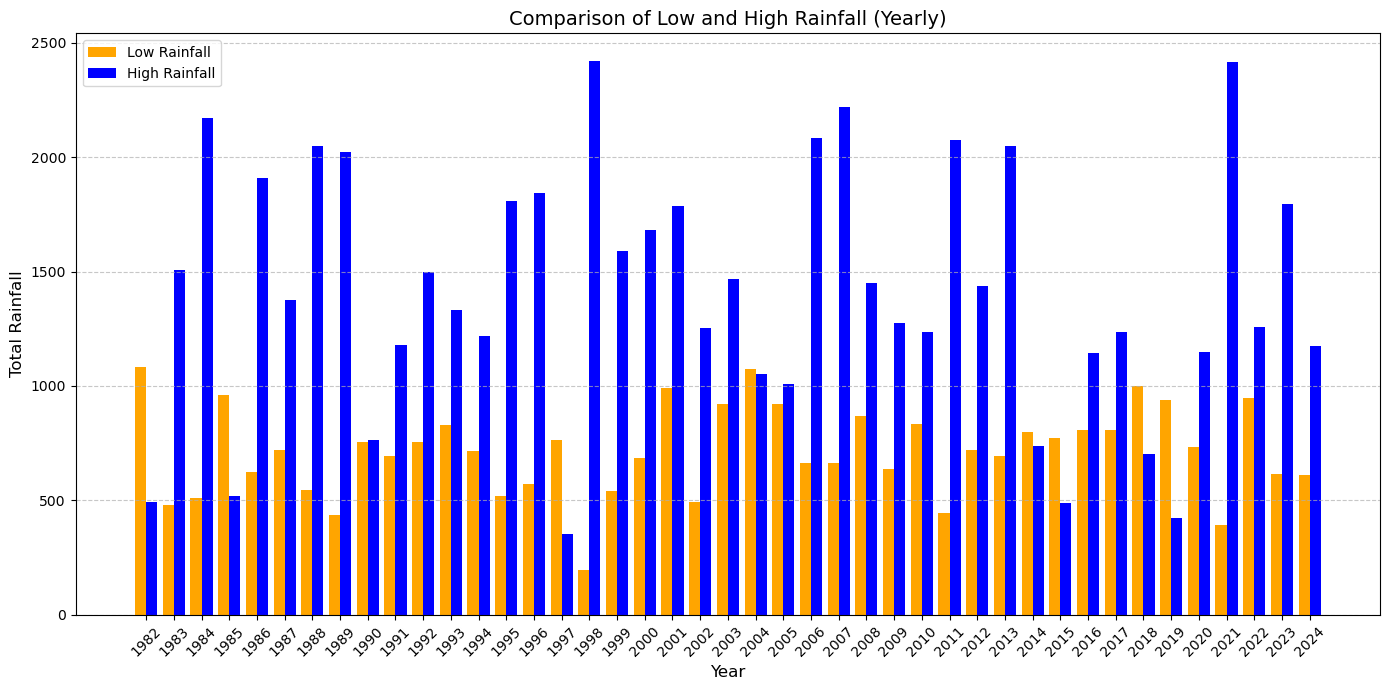

In [46]:
# Group data by 'year' to calculate the total low and high rainfall per year
yearly_rainfall = Rain.groupby('year')[['low_rainfall', 'high_rainfall']].sum().reset_index()

# Bar width for grouped bar chart
bar_width = 0.4
years = yearly_rainfall['year']
x = np.arange(len(years))  # the label locations

# Create the bar chart
plt.figure(figsize=(14, 7))

# Bars for low rainfall
plt.bar(x - bar_width / 2, yearly_rainfall['low_rainfall'], bar_width, label='Low Rainfall', color='orange')

# Bars for high rainfall
plt.bar(x + bar_width / 2, yearly_rainfall['high_rainfall'], bar_width, label='High Rainfall', color='blue')

# Adding labels, title, and legend
plt.title('Comparison of Low and High Rainfall (Yearly)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall', fontsize=12)
plt.xticks(x, years, rotation=45)  # Set the x-axis ticks to show years
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [47]:
# Assuming your DataFrame is named df
low_rainfall_total = Rain['low_rainfall'].sum()
high_rainfall_total = Rain['high_rainfall'].sum()

print("Total Low Rainfall:", low_rainfall_total)
print("Total High Rainfall:", high_rainfall_total)

Total Low Rainfall: 30723
Total High Rainfall: 60640


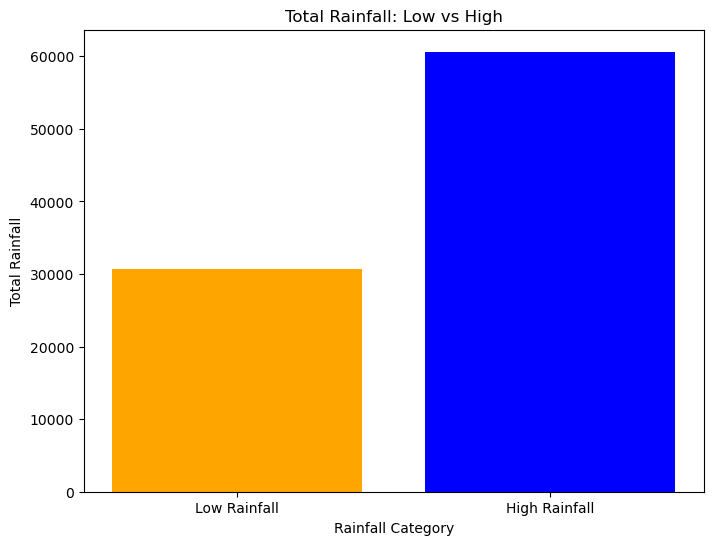

In [48]:
# Data for totals
categories = ['Low Rainfall', 'High Rainfall']
totals = [30723, 60640]

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, totals, color=['orange', 'blue'])
plt.title("Total Rainfall: Low vs High")
plt.ylabel("Total Rainfall")
plt.xlabel("Rainfall Category")
plt.show()

   quarter  total rainfall        season
0        1           22000  Q1 (Jan-Mar)
1        2           20038  Q2 (Apr-Jun)
2        3           18776  Q3 (Jul-Sep)
3        4           30549  Q4 (Oct-Dec)


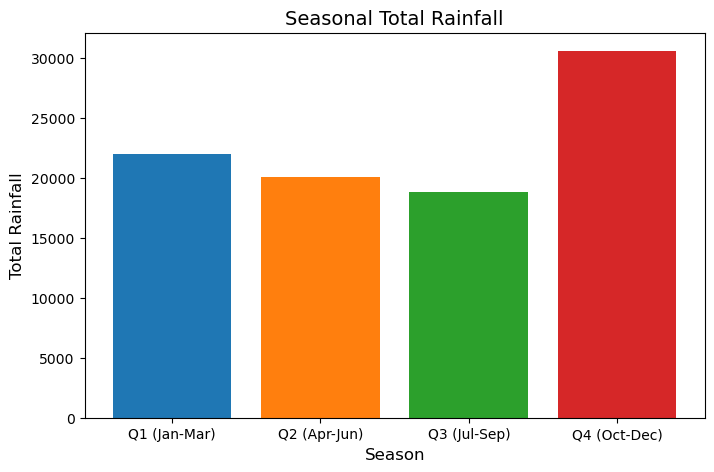

In [49]:
# Assuming 'Rain' is your dataframe with columns: 'month', 'total rainfall'
# Creating a new 'quarter' column based on the 'month' column
Rain['quarter'] = pd.to_datetime(Rain['month'], format='%Y-%m').dt.quarter

# Summarizing rainfall data by quarters
seasonal_rainfall = Rain.groupby('quarter')['total rainfall'].sum().reset_index()

# Adding a descriptive label for each quarter
seasonal_rainfall['season'] = seasonal_rainfall['quarter'].replace({
    1: 'Q1 (Jan-Mar)',
    2: 'Q2 (Apr-Jun)',
    3: 'Q3 (Jul-Sep)',
    4: 'Q4 (Oct-Dec)'
})

# Display the seasonal rainfall summary
print(seasonal_rainfall)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(seasonal_rainfall['season'], seasonal_rainfall['total rainfall'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Seasonal Total Rainfall', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rainfall', fontsize=12)
plt.show()


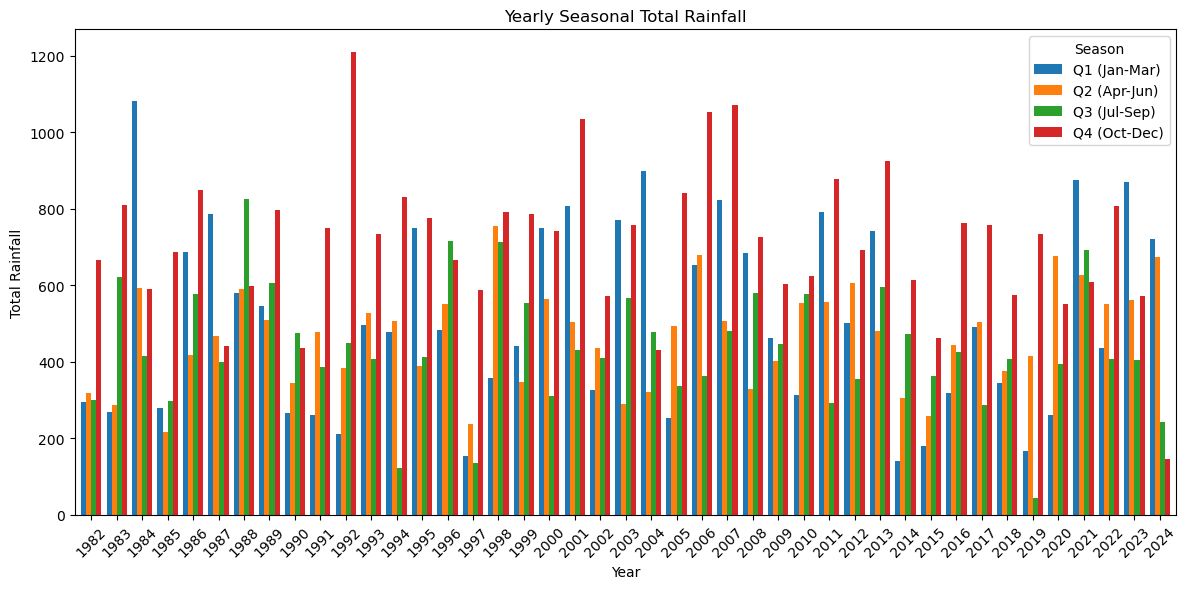

In [50]:
# Grouping Rain Data into Seasons
def assign_season(month):
    if month in [1, 2, 3]:
        return 'Q1 (Jan-Mar)'
    elif month in [4, 5, 6]:
        return 'Q2 (Apr-Jun)'
    elif month in [7, 8, 9]:
        return 'Q3 (Jul-Sep)'
    elif month in [10, 11, 12]:
        return 'Q4 (Oct-Dec)'

# Create 'Year' and 'Season' columns
Rain['year'] = pd.to_datetime(Rain['month']).dt.year
Rain['season'] = pd.to_datetime(Rain['month']).dt.month.apply(assign_season)

# Group by Year and Season to calculate total rainfall
seasonal_trends = Rain.groupby(['year', 'season'])['total rainfall'].sum().reset_index()

# Pivot the data for better visualization
pivot_trends = seasonal_trends.pivot(index='year', columns='season', values='total rainfall')

# Visualization: Grouped Bar Chart
pivot_trends.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Yearly Seasonal Total Rainfall')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


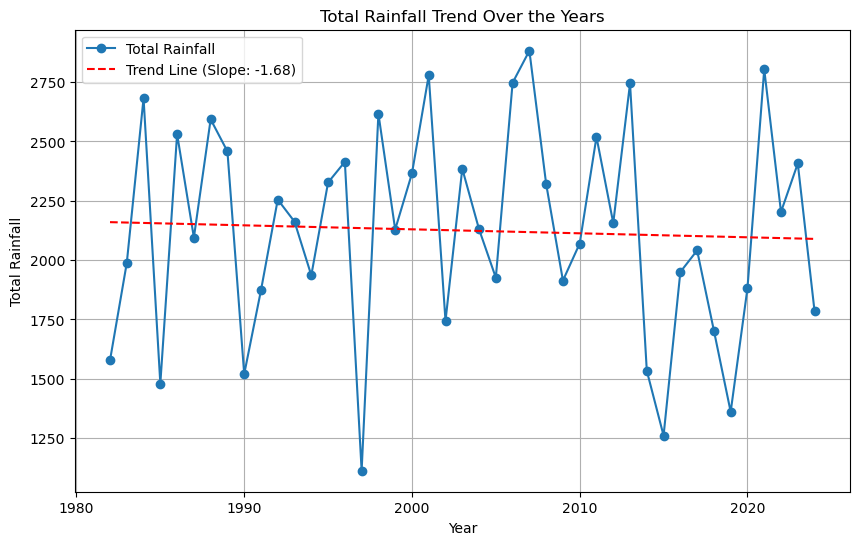

The slope of the trend line is: -1.68
The trend shows a decrease in rainfall over the years.


In [51]:
# Assume 'Rain' is the DataFrame containing rainfall data with 'year' and 'rainfall' columns
# Group by 'year' to get total rainfall per year
yearly_rainfall = Rain.groupby('year')['total rainfall'].sum().reset_index()

# Extract year and total rainfall
x = yearly_rainfall['year']
y = yearly_rainfall['total rainfall']

# Perform linear regression to get the trend line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Total Rainfall')
plt.plot(x, intercept + slope*x, color='red', linestyle='--', label=f'Trend Line (Slope: {slope:.2f})')

# Add labels, title, and legend
plt.title('Total Rainfall Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope to confirm trend direction
print(f"The slope of the trend line is: {slope:.2f}")
if slope > 0:
    print("The trend shows an increase in rainfall over the years.")
elif slope < 0:
    print("The trend shows a decrease in rainfall over the years.")
else:
    print("There is no significant trend in rainfall over the years.")


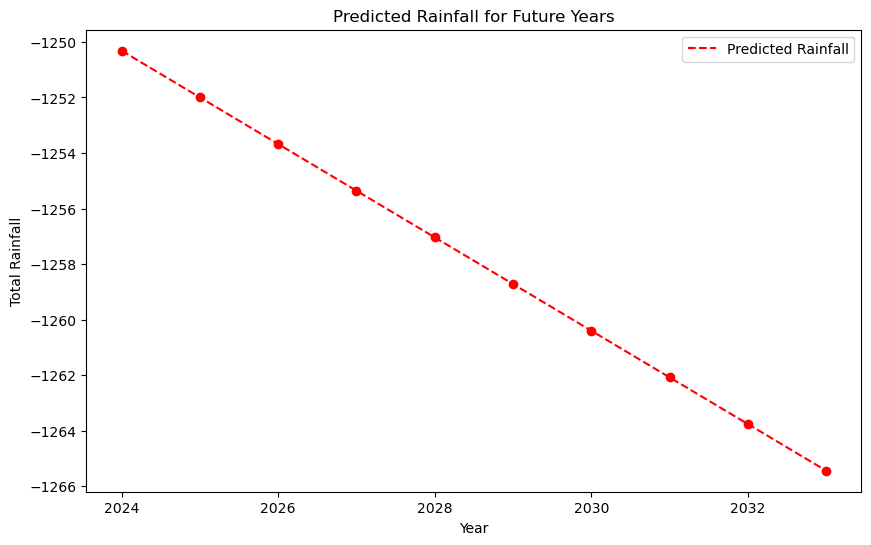

Predicted Rainfall in 2024: -1250.32
Predicted Rainfall in 2025: -1252.00
Predicted Rainfall in 2026: -1253.68
Predicted Rainfall in 2027: -1255.36
Predicted Rainfall in 2028: -1257.04
Predicted Rainfall in 2029: -1258.72
Predicted Rainfall in 2030: -1260.40
Predicted Rainfall in 2031: -1262.08
Predicted Rainfall in 2032: -1263.76
Predicted Rainfall in 2033: -1265.44


In [52]:
# Example data: slope and intercept from the trend line
slope = -1.68
intercept = 2150  

# Generate years for prediction
current_year = 2024
future_years = np.arange(current_year, current_year + 10)  # Predict next 10 years

# Calculate predicted rainfall
predicted_rainfall = slope * future_years + intercept

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(future_years, predicted_rainfall, 'r--', label='Predicted Rainfall')
plt.scatter(future_years, predicted_rainfall, color='red')
plt.title("Predicted Rainfall for Future Years")
plt.xlabel("Year")
plt.ylabel("Total Rainfall")
plt.legend()
plt.show()

# Print predictions
for year, rainfall in zip(future_years, predicted_rainfall):
    print(f"Predicted Rainfall in {year}: {rainfall:.2f}")


In [53]:
# Given data (predicted rainfall and years)
predicted_rainfall = np.array([-1250.32, -1252.00, -1253.68, -1255.36, -1257.04, -1258.72, -1260.40, -1262.08, -1263.76, -1265.44])
actual_rainfall = np.array([-1250, -1251, -1254, -1256, -1258, -1260, -1261, -1263, -1264, -1266])  

# Calculate regression metrics
mae = mean_absolute_error(actual_rainfall, predicted_rainfall)
mse = mean_squared_error(actual_rainfall, predicted_rainfall)
r2 = r2_score(actual_rainfall, predicted_rainfall)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.68
Mean Squared Error (MSE): 0.58
R² Score: 0.98


In [2]:
pip install periodictable

Note: you may need to restart the kernel to use updated packages.Collecting periodictable
   ---------------------------------------- 0.0/811.1 kB ? eta -:--:--
    --------------------------------------- 10.2/811.1 kB ? eta -:--:--
    --------------------------------------- 10.2/811.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/811.1 kB 220.2 kB/s eta 0:00:04
   -- ------------------------------------ 61.4/811.1 kB 365.7 kB/s eta 0:00:03
   ------- ------------------------------ 163.8/811.1 kB 756.6 kB/s eta 0:00:01
   ----------- -------------------------- 256.0/811.1 kB 983.0 kB/s eta 0:00:01
   ----------------------- ---------------- 471.0/811.1 kB 1.6 MB/s eta 0:00:01
   ----------------------------------- ---- 716.8/811.1 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  809.0/811.1 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 811.1/811.1 kB 2.0 MB/s eta 0:00:00



In [4]:
import periodictable

def get_element_info(symbol):
    element = getattr(periodictable, symbol, None)
    if element:
        print(f"Element:{element.name}")
        print(f"Symbol:{element.symbol}")
        print(f"Atomic Number:{element.number}")
        print(f"Atomic Mass:{element.mass} u")
    else:
        print("Element not found in the periodic table.")

if __name__ == "__main__":
    symbol = input("Enter the Element: ").capitalize()
    get_element_info(symbol)

Enter the Element:  Na


Element:sodium
Symbol:Na
Atomic Number:11
Atomic Mass:22.98976928 u


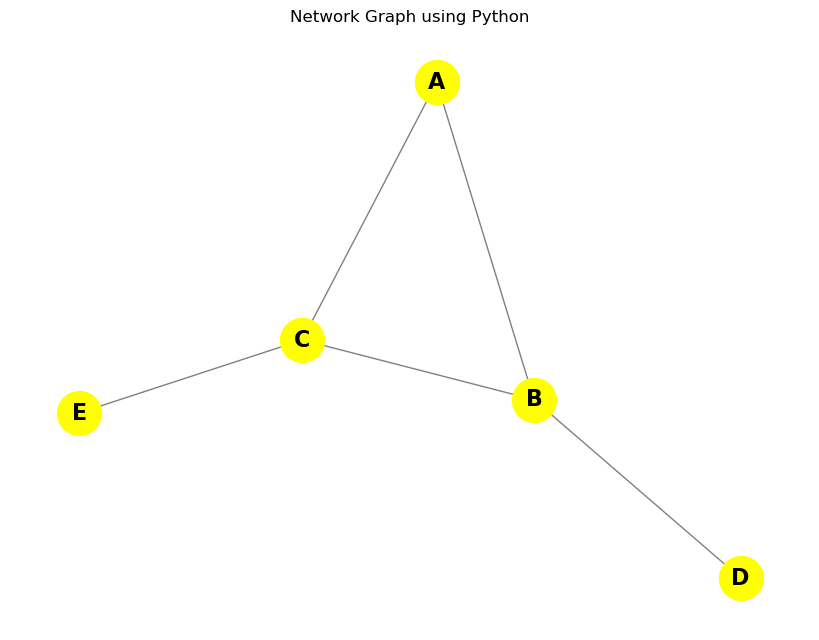

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E"])

edges=[("A", "B"), ("A", "C"), ("B", "C"), ("B", "D"), ("C", "E")]
G.add_edges_from(edges)

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color="yellow", node_size=1000,
        edge_color="gray", font_size=16, font_weight="bold")
plt.title("Network Graph using Python")
plt.show()

In [3]:
for i in range(1,6):
    print(" " * (5 - i) + "🪁" * i)
print("Happy Makar Sankranti!")

    🪁
   🪁🪁
  🪁🪁🪁
 🪁🪁🪁🪁
🪁🪁🪁🪁🪁
Happy Makar Sankranti!


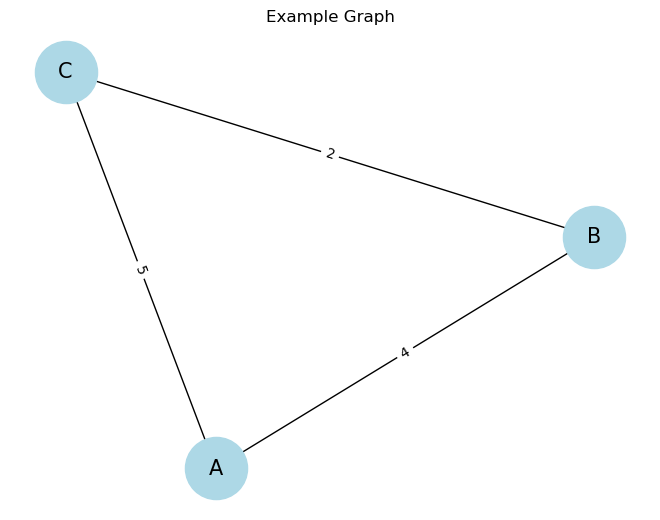

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes
G.add_node("A")
G.add_node("B")
G.add_node("C")

# Add edges
G.add_edge("A", "B", weight=4)
G.add_edge("B", "C", weight=2)
G.add_edge("C", "A", weight=5)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using a force-directed layout
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=15)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Example Graph")
plt.show()


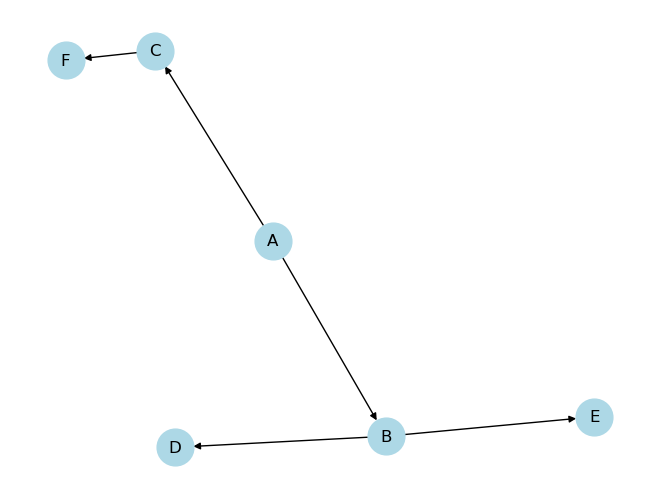

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a tree
tree = nx.DiGraph()  # Directed graph to represent a tree
tree.add_edges_from([
    ("A", "B"),
    ("A", "C"),
    ("B", "D"),
    ("B", "E"),
    ("C", "F")
])

# Visualize the tree
nx.draw(tree, with_labels=True, node_size=700, node_color="lightblue")
plt.show()


In [6]:
from scipy.integrate import quad
import numpy as np

# Define the function to integrate
def f(x):
    return np.sin(x)

# Integrate f(x) from 0 to π
result, error = quad(f, 0, np.pi)
print(f"Result: {result}, Estimated Error: {error}")


Result: 2.0, Estimated Error: 2.220446049250313e-14


In [7]:
from scipy.integrate import dblquad

# Define the function to integrate
def f(x, y):
    return x * y

# Integrate f(x, y) over the region 0 ≤ x ≤ 1 and 0 ≤ y ≤ 2
result, error = dblquad(f, 0, 1, lambda x: 0, lambda x: 2)
print(f"Result: {result}, Estimated Error: {error}")


Result: 0.9999999999999999, Estimated Error: 2.2156245316493716e-14


In [8]:
from sympy import symbols, integrate, sin, pi

# Define the variable and the function
x = symbols('x')
f = sin(x)

# Integrate f(x) from 0 to π
result = integrate(f, (x, 0, pi))
print(f"Result: {result}")


Result: 2


In [9]:
from sympy import symbols

# Define the variables and the function
x, y = symbols('x y')
f = x * y

# Integrate f(x, y) over the region 0 ≤ x ≤ 1 and 0 ≤ y ≤ 2
result = integrate(f, (x, 0, 1), (y, 0, 2))
print(f"Result: {result}")


Result: 1


In [10]:
import numpy as np

# Define the function to integrate
def f(x):
    return np.exp(-x**2)

# Monte Carlo integration over the interval [0, 1]
N = 100000  # Number of samples
samples = np.random.uniform(0, 1, N)
integral = np.mean(f(samples)) * (1 - 0)  # Scale by interval length
print(f"Result: {integral}")


Result: 0.7465940247507155


In [11]:
from scipy.integrate import trapezoid

# Sample data points
x = np.linspace(0, np.pi, 100)
y = np.sin(x)

# Integrate using the trapezoidal rule
result = trapezoid(y, x)
print(f"Result: {result}")


Result: 1.9998321638939927


In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium
from geopy.geocoders import Nominatim, GoogleV3
from IPython.display import display, HTML
import socket

# Function to check if the internet is available
def check_internet():
    try:
        # Try connecting to a reliable site (Google)
        socket.create_connection(("www.google.com", 80), timeout=5)
        return True
    except (socket.timeout, socket.gaierror):
        return False

# Get the location from user input
location_name = input("Enter a location: ")

# Initialize the geolocator (Nominatim by default)
geolocator = Nominatim(user_agent="geoapi")

# Check if internet is available
if check_internet():
    try:
        # Geocode the location
        location = geolocator.geocode(location_name)

        # If Nominatim fails, use Google Maps (requires an API key)
        if location is None:
            print("Nominatim failed, trying Google Maps...")
            geolocator = GoogleV3(api_key="YOUR_GOOGLE_MAPS_API_KEY")  # Replace with your Google Maps API key
            location = geolocator.geocode(location_name)

        # Check if location was found
        if location:
            # Create a map centered on the user's location
            latitude = location.latitude
            longitude = location.longitude
            map_object = folium.Map(location=[latitude, longitude], zoom_start=12)

            # Add a marker at the location
            marker = folium.Marker([latitude, longitude], popup=location_name)
            marker.add_to(map_object)

            # Display the map
            display(HTML(map_object._repr_html_()))
        else:
            print("Location not found. Please try again.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("No internet connection. Please check your network.")


Enter a location:  bhubaneswar


In [4]:
import sympy as sym
x=sym.Symbol('x')
func=input("Enter the function: ")
sym.Derivative(func, x) 

Enter the function:  log(x)


Derivative(log(x), x)

In [6]:
sym.Derivative(func, x, evaluate=True)

1/x

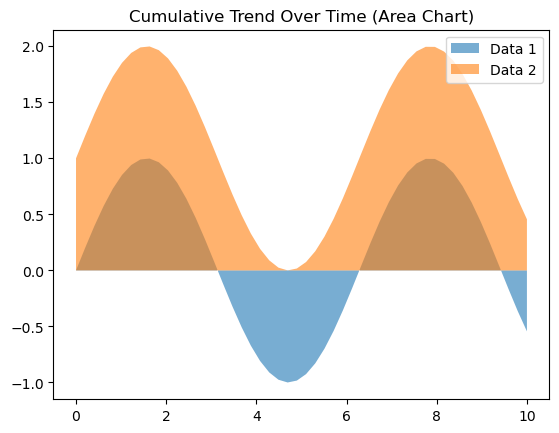

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0, 10, 50)
y1=np.sin(x)
y2=np.sin(x) + 1

plt.fill_between(x, y1, alpha=0.6, label='Data 1')
plt.fill_between(x, y2, alpha=0.6, label='Data 2')

plt.title('Cumulative Trend Over Time (Area Chart)')
plt.legend()
plt.show()

In [11]:
import tkinter as tk
from tkinter import messagebox
import networkx as nx
import matplotlib.pyplot as plt

class AirlineSchedulingGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Airline Scheduling System")
        
        self.graph = nx.DiGraph()
        self.edges = []
        
        tk.Label(root, text="From Airport:").grid(row=0, column=0)
        tk.Label(root, text="To Airport:").grid(row=1, column=0)
        tk.Label(root, text="Capacity:").grid(row=2, column=0)
        
        self.from_airport = tk.Entry(root)
        self.to_airport = tk.Entry(root)
        self.capacity = tk.Entry(root)
        
        self.from_airport.grid(row=0, column=1)
        self.to_airport.grid(row=1, column=1)
        self.capacity.grid(row=2, column=1)
        
        tk.Button(root, text="Add Flight", command=self.add_flight).grid(row=3, column=0, columnspan=2)
        tk.Button(root, text="Show Graph", command=self.show_graph).grid(row=4, column=0, columnspan=2)
        tk.Button(root, text="Find Max Flow", command=self.find_max_flow).grid(row=5, column=0, columnspan=2)
        
    def add_flight(self):
        try:
            from_airport = int(self.from_airport.get())
            to_airport = int(self.to_airport.get())
            capacity = int(self.capacity.get())
            
            self.graph.add_edge(from_airport, to_airport, capacity=capacity)
            self.edges.append((from_airport, to_airport, capacity))
            
            messagebox.showinfo("Success", "Flight added successfully!")
        except ValueError:
            messagebox.showerror("Error", "Please enter valid integer values.")
        
    def show_graph(self):
        plt.figure(figsize=(6, 4))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
        edge_labels = {(u, v): d['capacity'] for u, v, d in self.graph.edges(data=True)}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        plt.title("Airline Network")
        plt.show()
        
    def find_max_flow(self):
        if len(self.graph.nodes) < 2:
            messagebox.showerror("Error", "Please add more flights before calculating max flow.")
            return
        
        source = min(self.graph.nodes)
        sink = max(self.graph.nodes)
        
        max_flow_value, _ = nx.maximum_flow(self.graph, source, sink, capacity='capacity')
        messagebox.showinfo("Max Flow", f"The maximum flow from {source} to {sink} is: {max_flow_value}")

if __name__ == "__main__":
    root = tk.Tk()
    app = AirlineSchedulingGUI(root)
    root.mainloop()


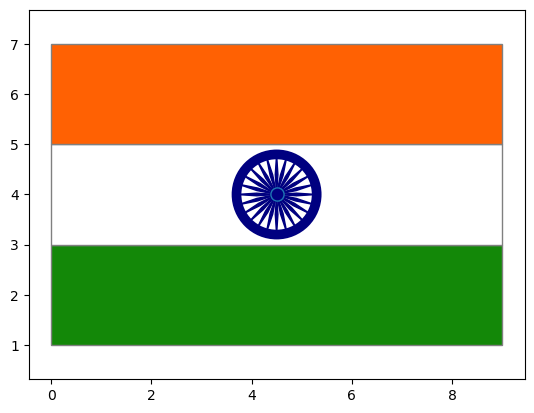

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch

# Plotting the tri-colors in the national flag
a = patch.Rectangle((0, 1), width=9, height=2, facecolor='#138808', edgecolor='grey')
b = patch.Rectangle((0, 3), width=9, height=2, facecolor='#ffffff', edgecolor='grey')
c = patch.Rectangle((0, 5), width=9, height=2, facecolor='#FF6103', edgecolor='grey')

fig, ax = plt.subplots()
ax.add_patch(a)
ax.add_patch(b)
ax.add_patch(c)

# Ashok Chakra Circle
radius = 0.8
ax.plot(4.5, 4, marker='o', markerfacecolor='#000080', markersize=9.5)
chakra = plt.Circle((4.5, 4), radius, color='#000080', fill=False, linewidth=7)
ax.add_artist(chakra)

# 24 spokes in Ashok Chakra
for i in range(0, 24):
    p = 4.5 + radius / 2 * np.cos(np.pi * i / 12 + np.pi / 48)
    q = 4.5 + radius / 2 * np.cos(np.pi * i / 12 - np.pi / 48)
    r = 4 + radius / 2 * np.sin(np.pi * i / 12 + np.pi / 48)
    s = 4 + radius / 2 * np.sin(np.pi * i / 12 - np.pi / 48)
    t = 4.5 + radius * np.cos(np.pi * i / 12)
    u = 4 + radius * np.sin(np.pi * i / 12)
    ax.add_patch(patch.Polygon([[4.5, 4], [p, r], [t, u], [q, s]], fill=True, closed=True, color='#000080'))

plt.axis('equal')
plt.show()

In [13]:
from functools import total_ordering

@total_ordering
class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __eq__(self, other):
        """Check if two cards are equal based on rank."""
        if isinstance(other, Card):
            return self.rank == other.rank
        return NotImplemented

    def __lt__(self, other):
        """Check if this card is less than another based on rank."""
        if isinstance(other, Card):
            return self.rank < other.rank
        return NotImplemented

    def __repr__(self):
        """Return a string representation of the card."""
        return f"Card(rank={self.rank}, suit={self.suit})"


# Example usage
card1 = Card(10, "Hearts")
card2 = Card(7, "Diamonds")
card3 = Card(10, "Spades")

print(card1 == card3)  # True, because ranks are equal
print(card1 > card2)   # True, because 10 > 7
print(card2 <= card3)  # True, because 7 <= 10
print(card1 != card2)  # True, because 10 != 7

True
True
True
True


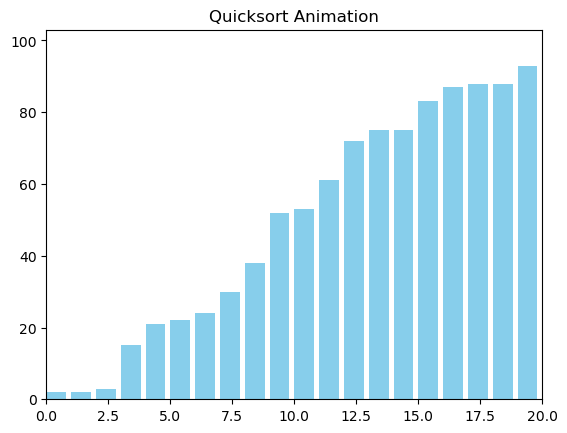

D:\biswanath\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def quicksort(arr, low, high, frames):
    """Quicksort algorithm with animation frames."""
    if low < high:
        pivot_index = partition(arr, low, high, frames)
        quicksort(arr, low, pivot_index - 1, frames)
        quicksort(arr, pivot_index + 1, high, frames)

def partition(arr, low, high, frames):
    """Partition the array and return the pivot index."""
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            frames.append(arr.copy())  # Capture the current state of the array

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    frames.append(arr.copy())  # Capture the final state after partitioning
    return i + 1

def update_fig(frame, bars):
    """Update the bar heights for each frame of the animation."""
    for bar, height in zip(bars, frame):
        bar.set_height(height)
    return bars

def main():
    # Generate random data
    np.random.seed(42)
    data = np.random.randint(1, 100, 20)
    frames = [data.copy()]  # Store the initial state of the array

    # Perform quicksort and capture frames
    quicksort(data, 0, len(data) - 1, frames)

    # Set up the figure and axis
    fig, ax = plt.subplots()
    ax.set_title("Quicksort Animation")
    ax.set_xlim(0, len(data))
    ax.set_ylim(0, max(data) + 10)

    # Create bars
    bars = ax.bar(range(len(data)), data, align="edge", color="skyblue")

    # Create animation
    anim = animation.FuncAnimation(
        fig,
        update_fig,
        frames=frames,
        fargs=(bars,),
        interval=200,  # Delay between frames in milliseconds
        repeat=False,
    )

    # Display the animation
    plt.show()


if __name__ == "__main__":
    main()

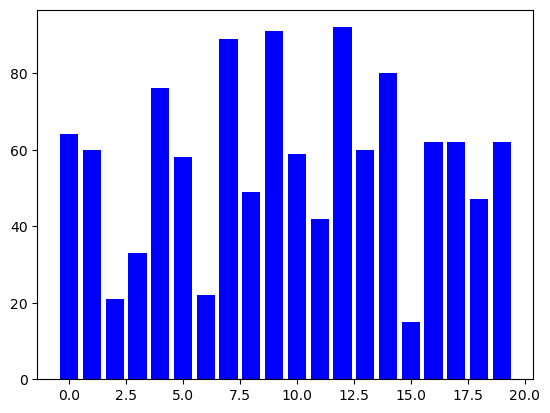

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Generate random data
data = np.random.randint(1, 100, 20)

fig, ax = plt.subplots()
bars = ax.bar(range(len(data)), data, color='blue')

def quicksort(arr, low, high, frames):
    if low < high:
        pivot_index = partition(arr, low, high, frames)
        quicksort(arr, low, pivot_index - 1, frames)
        quicksort(arr, pivot_index + 1, high, frames)

def partition(arr, low, high, frames):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            frames.append(arr.copy())
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    frames.append(arr.copy())
    return i + 1

frames = [data.copy()]
quicksort(data, 0, len(data) - 1, frames)

def update(frame):
    for rect, height in zip(bars, frame):
        rect.set_height(height)

ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False, interval=300)
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(1000, 5)  # 1000 samples, 5 features
y = np.random.randint(0, 2, 1000)  # Binary target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Save the model (for cloud deployment)
import joblib
joblib.dump(model, 'logistic_model.pkl')

# Uploading to Cloud Platforms:
# Microsoft Azure: Upload logistic_model.pkl to Azure ML workspace
# IBM Watson: Upload logistic_model.pkl to IBM Watson Studio
# Google Cloud AI: Upload logistic_model.pkl to Google Cloud Storage for AI Platform deployment


Model Accuracy: 0.55


['logistic_model.pkl']

In [5]:
pip install opencv-python opencv-python-headless numpy matplotlib


   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.4 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.1/39.4 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.2/39.4 MB 1.3 MB/s eta 0:00:32
   ---------------------------------------- 0.2/39.4 MB 1.3 MB/s eta 0:00:32
   ---------------------------------------- 0.2/39.4 MB 1.3 MB/s eta 0:00:32
   ---------------------------------------- 0.2/39.4 MB 1.3 MB/s eta 0:00:32
   ---------------------------------------- 0.3/39.4 MB 739.6 kB/s eta 0:00:53
   ---------------------------------------- 0.3/39.4 MB 780.0 kB/s eta 0:00:51
   ---------------------------------------- 0.4/39.4 MB 851.5 kB/s eta 0:00:46
   ---------------------------------------- 0.4/39.4 MB 844.5 kB/s eta 0:00:47
    --------------------------------------- 0.6/39.4 MB 992.2 kB/s eta 0:00:40
  

In [4]:
import cv2
import numpy as np

# Load pre-trained MobileNet SSD model
net = cv2.dnn.readNetFromCaffe(
    "MobileNetSSD_deploy.prototxt.txt",  # Model architecture
    "MobileNetSSD_deploy.caffemodel"    # Model weights
)

# Load class labels
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant",
           "sheep", "sofa", "train", "tvmonitor"]

# Load an image
image = cv2.imread("example.jpg")
(h, w) = image.shape[:2]

# Prepare the image for object detection
blob = cv2.dnn.blobFromImage(image, 0.007843, (300, 300), 127.5)
net.setInput(blob)
detections = net.forward()

# Loop over the detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections
    if confidence > 0.2:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw the bounding box and label
        label = f"{CLASSES[idx]}: {confidence:.2f}%"
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the output
cv2.imshow("Object Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
import cv2

# Load pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load an image
image = cv2.imread("face.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the output
cv2.imshow("Face Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
import cv2

# Load pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load an image
image = cv2.imread("face.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the output
cv2.imshow("Face Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
import cv2
import numpy as np
import os

# Load the LBPH face recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Train the recognizer (replace with your dataset)
def train_recognizer():
    faces = []
    labels = []
    for label, person in enumerate(os.listdir("dataset")):
        for image_name in os.listdir(f"dataset/{person}"):
            image_path = f"dataset/{person}/{image_name}"
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            faces.append(image)
            labels.append(label)
    recognizer.train(faces, np.array(labels))

# Recognize faces in a new image
def recognize_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    label, confidence = recognizer.predict(gray)
    return label, confidence

# Example usage
train_recognizer()
image = cv2.imread("test.jpg")
label, confidence = recognize_face(image)
print(f"Recognized person: {label} with confidence: {confidence}")

error: OpenCV(4.13.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1127: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "MobileNetSSD_deploy.prototxt.txt" in function 'cv::dnn::ReadProtoFromTextFile'


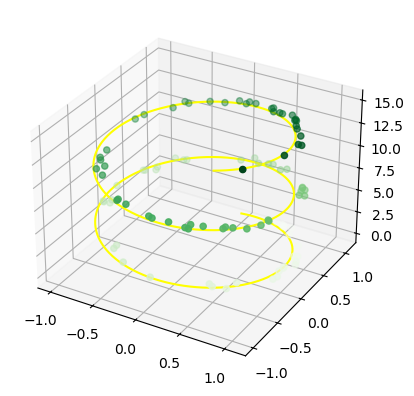

In [4]:
import numpy as np
import matplotlib.pyplot as plt
ax=plt.axes(projection='3d')
z=np.linspace(0, 15, 1000)
x=np.sin(z)
y=np.cos(z)
ax.plot3D(x, y, z, 'yellow')

z=15*np.random.random(100)
x=np.sin(z) + 0.1 * np.random.random(100)
y=np.cos(z) + 0.1 * np.random.random(100)
ax.scatter3D(x, y, z, c=z, cmap='Greens')
plt.show()

In [4]:
class BankAccount:
    def __init__(self, account_holder, initial_balance=0):
        self.account_holder = account_holder
        self.balance = initial_balance

    def deposit(self, amount):
        """Deposit money into the account."""
        if amount > 0:
            self.balance += amount
            print(f"Deposited: ${amount:.2f}. New balance: ${self.balance:.2f}.")
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount):
        """Withdraw money from the account."""
        if amount > 0:
            if amount <= self.balance:
                self.balance -= amount
                print(f"Withdrew: ${amount:.2f}. New balance: ${self.balance:.2f}.")
            else:
                print("Insufficient funds for this withdrawal.")
        else:
            print("Withdrawal amount must be positive.")

    def get_balance(self):
        """Return the current balance."""
        return self.balance

    def display_account_details(self):
        """Display account holder and balance information."""
        print(f"Account Holder: {self.account_holder}")
        print(f"Current Balance: ${self.balance:.2f}")



   
    account = BankAccount("Viswanatha Sahu", 1000)
    account.display_account_details()
    account.deposit(500)
    account.withdraw(200)
    account.withdraw(1500)
print(f"Final Balance: ${account.get_balance():.2f}")

Account Holder: Viswanatha Sahu
Current Balance: $1000.00
Deposited: $500.00. New balance: $1500.00.
Withdrew: $200.00. New balance: $1300.00.
Insufficient funds for this withdrawal.
Final Balance: $1300.00


In [18]:
pip install opencv-python numpy ultralytics


  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   - -------------------------------------- 41.0/914.9 kB 1.9 MB/s eta 0:00:01
   ---- ----------------------------------- 112.6/914.9 kB 1.3 MB/s eta 0:00:01
   -------- ------------------------------- 204.8/914.9 kB 1.6 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/914.9 kB 1.5 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/914.9 kB 1.5 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/914.9 kB 1.5 MB/s eta 0:00:01
   ---------- --------------------------- 256.0/914.9 kB 787.7 kB/s eta 0:00:01
   ------------- ------------------------ 327.7/914.9 kB 884.2 kB/s eta 0:00:01
   ------------------- -------------------- 440.3/914.9 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 522.2/914.9 kB 1.2 MB/s eta 0:00:01
   ---------------------- ----------------- 522.2/914.

In [6]:
pip install --upgrade "optree>=0.13.0"


     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.6 kB ? eta -:--:--
     ---------------- --------------------- 20.5/48.6 kB 330.3 kB/s eta 0:00:01
     -------------------------------- ----- 41.0/48.6 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 48.6/48.6 kB 306.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.4 kB 1.9 MB/s eta 0:00:01
   --------------------- ------------------ 163.8/300.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.4 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.4/300.4 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: optree
    Found existing installation: optree 0.12.1
    Uninstalling optree-0.12.1:
      Successfully uninstalled optree-0.12.1


In [8]:
import cv2
import numpy as np
from ultralytics import YOLO
import torch
import typing_extensions
print("Torch Version:", torch.__version__)
print("Typing Extensions Version:", typing_extensions.__version__)


# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Use the YOLO model (ensure you have the weights)

# Traffic light state
traffic_signal = "GREEN"

# Open video capture (replace with video file or 0 for webcam)
cap = cv2.VideoCapture("traffic_video.mp4")

# Define region of interest (ROI) for vehicle counting
ROI_TOP, ROI_BOTTOM = 300, 500

def detect_vehicles(frame):
    """Detect vehicles in the frame using YOLOv8."""
    results = model(frame)
    vehicle_count = 0

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0].item()
            class_id = int(box.cls[0].item())

            # Filter only vehicle classes (cars, buses, trucks, motorcycles)
            if class_id in [2, 3, 5, 7] and confidence > 0.4:  
                vehicle_count += 1
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"Vehicle {vehicle_count}", (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return frame, vehicle_count

def update_traffic_signal(vehicle_count):
    """Update traffic light based on vehicle density."""
    global traffic_signal

    if vehicle_count > 10:
        traffic_signal = "RED"
    elif vehicle_count > 5:
        traffic_signal = "YELLOW"
    else:
        traffic_signal = "GREEN"

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize frame for faster processing
    frame = cv2.resize(frame, (800, 600))

    # Detect vehicles
    processed_frame, vehicle_count = detect_vehicles(frame)

    # Update traffic signal
    update_traffic_signal(vehicle_count)

    # Display traffic signal status
    cv2.putText(processed_frame, f"Traffic Signal: {traffic_signal}", (50, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255) if traffic_signal == "RED" else (0, 255, 255) if traffic_signal == "YELLOW" else (0, 255, 0), 3)

    cv2.imshow("Traffic Management System", processed_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'ultralytics'

In [7]:
pip install ultralytics

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------------------------- ---- 1.0/1.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   - -------------------------------------- 1.3/40.2 MB 7.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.9/40.2 MB 7.3 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/40.2 MB 7.0 MB/s eta 0:00:06
   ----- ---------------------------------- 5.2/40.2 MB 6.5 MB/s eta 0:00:06
   ------ --------------------------------- 6.3/40.2 MB 6.1 MB/s eta 0:00:06
   ------- -------------------------------- 7.3/40.2 MB 6.2 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/40.2 MB 6.0 MB/s eta 0:00:06
   --------- ---------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\VISWANATHA SAHU\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
from ultralytics import YOLO
print(YOLO('yolov8n.pt'))


ModuleNotFoundError: No module named 'ultralytics'

In [2]:
from datetime import datetime

valentines_day = datetime(datetime.today().year, 2, 14)
today = datetime.today()
days_left = (valentines_day - today).days

print(f"❤️ Only {days_left} days left until Valentine's Day! ❤️")


❤️ Only 3 days left until Valentine's Day! ❤️


In [3]:
for row in range(6):
    for col in range(7):
        if (row == 0 and col % 3 != 0) or (row == 1 and col % 3 == 0) or (row - col == 2) or (row + col == 8):
            print("♥", end=" ")
        else:
            print(" ", end=" ")
    print()


  ♥ ♥   ♥ ♥   
♥     ♥     ♥ 
♥           ♥ 
  ♥       ♥   
    ♥   ♥     
      ♥       


In [4]:
print("  ♥   ♥   ")
print(" ♥ ♥ ♥ ♥ ")
print("  ♥   ♥  ")
print("   ♥ ♥   ")
print("    ♥    ")


  ♥   ♥   
 ♥ ♥ ♥ ♥ 
  ♥   ♥  
   ♥ ♥   
    ♥    


In [5]:
import turtle

screen = turtle.Screen()  # Create a screen object
screen.bgcolor("black")

t = turtle.Turtle()
t.speed(3)
t.pensize(3)
t.pencolor("red")

def draw_heart():
    t.fillcolor("red")
    t.begin_fill()
    t.left(140)
    t.forward(180)
    t.circle(-90, 200)
    t.left(120)
    t.circle(-90, 200)
    t.forward(180)
    t.end_fill()

draw_heart()

t.hideturtle()
screen.mainloop()  # Keeps the window open


In [4]:
def find_depth_in_generic_tree(parent):
    max_depth = 0
    current_depth = 0
    for i in range(0, len(parent)):
        j=i
        while(parent[j] != -1):
            current_depth += 1
            j = parent[j]
        if(current_depth > max_depth):
            max_depth = current_depth
        return max_depth

parent=[-1,0,1,6,6,0,0,2,7]
print("Depth of given  generic tree is:",find_depth_in_generic_tree(parent))


Depth of given  generic tree is: 0


In [10]:
import cv2
import numpy as np
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt

def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


print("Torch Version:", torch.__version__)

# Load YOLO model with GPU support if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = YOLO("yolov8n.pt").to(device)

# Open video file or webcam
cap = cv2.VideoCapture("traffic_video.mp4")  

# Traffic signal status
traffic_signal = "GREEN"
frame_count = 0  

def detect_vehicles(frame):
    """Detect vehicles using YOLOv8 and count them."""
    results = model(frame, conf=0.5, iou=0.45)
    vehicle_count = 0

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0].item()
            class_id = int(box.cls[0].item())

            # Vehicle class IDs in COCO: Car=2, Motorcycle=3, Bus=5, Truck=7
            if class_id in [2, 3, 5, 7] and confidence > 0.4:  
                vehicle_count += 1
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"Vehicle {vehicle_count}", (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame, vehicle_count

def update_traffic_signal(vehicle_count):
    """Determine the traffic light state based on vehicle density."""
    global traffic_signal
    if vehicle_count > 10:
        traffic_signal = "RED"
    elif vehicle_count > 5:
        traffic_signal = "YELLOW"
    else:
        traffic_signal = "GREEN"

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Process every 5th frame for efficiency
    if frame_count % 5 != 0:
        continue

    frame = cv2.resize(frame, (640, 480))  # Reduce resolution for speed

    # Detect vehicles
    processed_frame, vehicle_count = detect_vehicles(frame)

    # Update traffic signal
    update_traffic_signal(vehicle_count)

    # Display signal status
    signal_color = (0, 0, 255) if traffic_signal == "RED" else (0, 255, 255) if traffic_signal == "YELLOW" else (0, 255, 0)
    cv2.putText(processed_frame, f"Traffic Signal: {traffic_signal}", (50, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, signal_color, 3)

    cv2.imshow("Traffic Management System", processed_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.waitKey(1)  # Ensures all OpenCV windows process their close event
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'ultralytics'

In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt

def show_image(img):
    """Display an image using Matplotlib (for headless environments)."""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

print("Torch Version:", torch.__version__)

# Load YOLO model with GPU support if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = YOLO("yolov8n.pt").to(device)

# Open video file or webcam
cap = cv2.VideoCapture("traffic_video.mp4")  

# Traffic signal status
traffic_signal = "GREEN"
frame_count = 0  

def detect_vehicles(frame):
    """Detect vehicles using YOLOv8 and count them."""
    results = model(frame, conf=0.5, iou=0.45)
    vehicle_count = 0

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0].item()
            class_id = int(box.cls[0].item())

            # Vehicle class IDs in COCO: Car=2, Motorcycle=3, Bus=5, Truck=7
            if class_id in [2, 3, 5, 7] and confidence > 0.4:  
                vehicle_count += 1
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"Vehicle {vehicle_count}", (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame, vehicle_count

def update_traffic_signal(vehicle_count):
    """Determine the traffic light state based on vehicle density."""
    global traffic_signal
    if vehicle_count > 10:
        traffic_signal = "RED"
    elif vehicle_count > 5:
        traffic_signal = "YELLOW"
    else:
        traffic_signal = "GREEN"

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Process every 5th frame for efficiency
    if frame_count % 5 != 0:
        continue

    frame = cv2.resize(frame, (640, 480))  # Reduce resolution for speed

    # Detect vehicles
    processed_frame, vehicle_count = detect_vehicles(frame)

    # Update traffic signal
    update_traffic_signal(vehicle_count)

    # Display signal status
    signal_color = (0, 0, 255) if traffic_signal == "RED" else (0, 255, 255) if traffic_signal == "YELLOW" else (0, 255, 0)
    cv2.putText(processed_frame, f"Traffic Signal: {traffic_signal}", (50, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, signal_color, 3)

    # Instead of cv2.imshow(), use Matplotlib
    show_image(processed_frame)

    # Break condition (remove cv2.waitKey())
    if frame_count > 50:  # Process only 50 frames for testing
        break

cap.release()


ModuleNotFoundError: No module named 'ultralytics'

In [17]:
import cv2
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Read image
image_path = "test_image.jpg"  # Change this to your image path
image = cv2.imread(image_path)

# Detect objects
results = model(image)

# Draw detections on image
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
        confidence = box.conf[0].item()  # Confidence score
        class_id = int(box.cls[0].item())  # Class ID

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"Class {class_id} ({confidence:.2f})", (x1, y1 - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show image (only works if GUI is available)
cv2.imshow("Detected Image", image)
cv2.waitKey(0)  # Wait for key press
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] No such file or directory: 'test_image.jpg'

In [19]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")

# Read image
image_path = r"D:\images\test_image.jpg"    # Change this to your image path
image = cv2.imread(image_path)

# Detect objects
results = model(image)

# Draw detections on image
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
        confidence = box.conf[0].item()  # Confidence score
        class_id = int(box.cls[0].item())  # Class ID

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"Class {class_id} ({confidence:.2f})", (x1, y1 - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert BGR to RGB (Matplotlib needs RGB format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\images\\test_image.jpg'

In [2]:
from ultralytics import YOLO
import cv2
import math 
# start webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

# model
model = YOLO("C:\\Users\\hp\Downloads\\yolov8n.pt")

# object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]


while True:
    success, img = cap.read()
    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\VISWANATHA SAHU\AppData\Local\Temp\ipykernel_13844\1623600693.py:10: SyntaxWarning: invalid escape sequence '\D'
  model = YOLO("C:\\Users\\hp\Downloads\\yolov8n.pt")
C:\Users\VISWANATHA SAHU\AppData\Local\Temp\ipykernel_13844\1623600693.py:10: SyntaxWarning: invalid escape sequence '\D'
  model = YOLO("C:\\Users\\hp\Downloads\\yolov8n.pt")


ModuleNotFoundError: No module named 'ultralytics'

In [3]:
from ultralytics import YOLO
import cv2
import math
from IPython.display import clear_output, Image, display
import PIL.Image
import io
import numpy as np

def cv2_imshow(img):
    """Display an image in a Jupyter notebook"""
    ret, jpeg = cv2.imencode('.jpg', img)
    display(PIL.Image.open(io.BytesIO(jpeg.tobytes())))

# start webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

# model
model = YOLO("C:\\Users\\hp\\Downloads\\yolov8n (1).pt")

# object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

try:
    while True:
        success, img = cap.read()
        if not success:
            print("Failed to grab frame")
            break
            
        results = model(img, stream=True)

        # coordinates
        for r in results:
            boxes = r.boxes

            for box in boxes:
                # bounding box
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                # put box in cam
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

                # confidence
                confidence = math.ceil((box.conf[0]*100))/100
                print("Confidence --->", confidence)

                # class name
                cls = int(box.cls[0])
                print("Class name -->", classNames[cls])

                # object details
                org = [x1, y1]
                font = cv2.FONT_HERSHEY_SIMPLEX
                fontScale = 1
                color = (255, 0, 0)
                thickness = 2

                cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

        clear_output(wait=True)
        cv2_imshow(img)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
except KeyboardInterrupt:
    print("Stopped by user")
finally:
    cap.release()
    cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'ultralytics'

In [3]:
from ultralytics import YOLO
import cv2
import os

# Check if the video file exists
video_path = "C:\\Users\\hp\\Downloads\\AI-based-Traffic-Control-System---main\\AI-based-Traffic-Control-System---main\\datas\\video.mp4"
if not os.path.exists(video_path):
    print(f"Error: File '{video_path}' not found!")
    exit()

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Ensure the model file is in the correct path

# Open video file
cap = cv2.VideoCapture(video_path)

# Object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

while cap.isOpened():
    success, img = cap.read()
    
    # Check if frame is captured
    if not success or img is None:
        print("Error: Failed to capture image!")
        break

    # Perform object detection
    results = model(img)  # Remove stream=True

    # Process detection results
    for r in results:
        for box in r.boxes:
            # Bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to int values
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # Confidence score
            confidence = round(box.conf[0].item(), 2)
            cls = int(box.cls[0])

            # Display object details
            cv2.putText(img, f"{classNames[cls]} {confidence}", (x1, y1), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display frame
    cv2.imshow("YOLOv8 Detection", img)
    
    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 (no detections), 1099.4ms
Speed: 131.9ms preprocess, 1099.4ms inference, 62.2ms postprocess per image at shape (1, 3, 384, 640)


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [4]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Function to display an image using Matplotlib
def show_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img)
    plt.axis("on")
    plt.show()

# Check if the video file exists
video_path = "C:\\Users\\hp\\Downloads\\AI-based-Traffic-Control-System---main\\AI-based-Traffic-Control-System---main\\datas\\video.mp4"
if not os.path.exists(video_path):
    print(f"Error: File '{video_path}' not found!")
    exit()

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Ensure the model file is in the correct path

# Open video file
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    success, img = cap.read()
    
    # Check if frame is captured
    if not success or img is None:
        print("Error: Failed to capture image!")
        break

    # Perform object detection
    results = model(img)

    # Process detection results
    for r in results:
        for box in r.boxes:
            # Bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert to int values
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # Confidence score
            confidence = round(box.conf[0].item(), 2)
            cls = int(box.cls[0])

            # Display object details
            cv2.putText(img, f"{classNames[cls]} {confidence}", (x1, y1), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Use Matplotlib instead of cv2.imshow()
    show_image(img)
    
    # Wait for user to close the image before moving to the next frame
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'ultralytics'

In [41]:
import sys
import argparse
import pathlib
import os

# 1. Check if "common" directory exists, create if not
common_dir = os.path.join(str(pathlib.Path.cwd().parents[0]), "common")
if not os.path.exists(common_dir):
    os.makedirs(common_dir)
    print(f"Created 'common' directory at: {common_dir}")

# 2. Adjust the path to utils.py
# If utils.py is in the "common" folder, use this:
utils_path = os.path.join(common_dir, "utils.py")
# If utils.py is in the current directory, use this:
# utils_path = "utils.py"

# If utils.py is in another specific folder you can use that, 
# e.g if it is in a parent/custom_folder then,
# utils_path = os.path.join(str(pathlib.Path.cwd().parents[1]), "custom_folder", "utils.py")

sys.path.insert(1, common_dir)  # Add "common" to the path



def main(sources):
	#read image from each lanes video source
	vs  = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0])+"/datas/"+sources[0])
	vs2 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0])+"/datas/"+sources[1])
	vs3 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0])+"/datas/"+sources[2])
	vs4 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0])+"/datas/"+sources[3])

	#creates a network given yolov5s model
	net = cv2.dnn.readNet(str(pathlib.Path.cwd().parents[0])+"/content/yolov5s.onnx")
	net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
	net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
	ln = net.getUnconnectedOutLayersNames() # returns the name of output layer

	#initial configuration of each lanes order
	lanes = util.Lanes([util.Lane("","",1),util.Lane("","",3),util.Lane("","",4),util.Lane("","",2),])
	wait_time=0

	while True:

		# read the next frame from the 
		(success, frame) = vs.read()
		(success, frame2) = vs2.read()
		(success, frame3) = vs3.read()
		(success, frame4) = vs4.read()
		# if the frame was not successfuly captured, then we have reached the end
		# of the stream or there is disconnection
		if not success:
		        break
for i, lane in enumerate(lanes.getLanes()):
    if i == 0:
      lane.frame = frame
    elif i == 1:
        lane.frame = frame
    elif i == 2:
          lane.frame = frame3
    elif i == 3:
          lane.frame = frame4
    	
    start = time.time()
    lanes = util.final_output(net,ln,lanes) # returns lanes object with processed frame
    end = time.time()
    print("total processing:"+str(end-start))
    if wait_time<=0:
         images_transition=util.display_result(wait_time,lanes)    
         final_image = cv2.resize(images_transition,(1020,720))
         cv2.imshow("f",final_image)
         cv2.waitKey(100)
		   
		    
wait_time=util.schedule(lanes) # returns waiting duration of each lane
images_scheduled=util.display_result(wait_time,lanes)    
final_image = cv2.resize(images_scheduled,(1020,720))
cv2.imshow("f",final_image)
cv2.waitKey(1)
wait_time=wait_time-1
if __name__=="__main__":
    
    parser = argparse.ArgumentParser(description="Determines duaration based on car count on images")
    parser.add_argument("--sources",help="video feeds to be infered on, the videos must reside in the datas folder", type=str,default="video1.mp4,video5.mp4,video2.mp4,video3.mp4") 
    
    # Instead of parsing arguments from sys.argv, 
    # manually create a Namespace object with your desired values:
    args = parser.parse_args(['--sources', 'video1.mp4,video5.mp4,video2.mp4,video3.mp4'])  

    sources = args.sources.split(",")
    print(type(sources))
    main(sources)


PermissionError: [WinError 5] Access is denied: 'C:\\Users\\common'

In [7]:
import sys
import pathlib
import cv2
import time
import numpy as np
from Processor import Processor
import argparse
sys.path.insert(1,str(pathlib.Path.cwd().parents[0])+"/common")
import utils as util

def main(sources):
        
       

	#read image from each lanes video source
	vs  = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0])+"/datas/"+sources[0])
	vs2 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0])+"/datas/"+sources[1])
	vs3 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0])+"/datas/"+sources[2])
	vs4 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0])+"/datas/"+sources[3])
	print("dir:"+str(pathlib.Path.cwd().parents[0]))
	#generates a tensorrt engine with a given tensorrt model
	processor = Processor("yolov5s.trt")
	#initial configuration of each lanes order
	lanes = util.Lanes([util.Lane("","",1),util.Lane("","",2),util.Lane("","",3),util.Lane("","",4),])
	wait_time=0

	while True:

		# read the next frame from the 
		(success, frame) = vs.read()
		(success, frame2) = vs2.read()
		(success, frame3) = vs3.read()
		(success, frame4) = vs4.read()
		# if the frame was not successfuly captured, then we have reached the end
		# of the stream or there is disconnection
		if not success:
		        break
		# assigns each lane its corresponding frame
		for i,lane in enumerate(lanes.getLanes()):
		    if(lane.lane_number==1):

		        lane.frame=frame
		    elif(lane.lane_number==2):
		        
		        lane.frame=frame2
		    elif(lane.lane_number==3):
		        
		        lane.frame=frame3
		    elif(lane.lane_number==4):
		        
		        lane.frame= frame4
		start = time.time()
		lanes = util.final_output_tensorrt(processor,lanes) # returns lanes object with processed frame
		end = time.time()
		print("total processing:"+str(end-start))
		if wait_time<=0:
		   images_transition=util.display_result(wait_time,lanes)    
		   final_image = cv2.resize(images_transition,(1080,720))
		   cv2.imshow("f",final_image)
		   cv2.waitKey(10)
		   
		    
		   wait_time=util.schedule(lanes) # returns waiting duration of each lane
		images_scheduled=util.display_result(wait_time,lanes)    
		final_image = cv2.resize(images_scheduled,(1080,720))
		cv2.imshow("f",final_image)
		cv2.waitKey(1)
		wait_time=wait_time-1
                
if __name__=="__main__":
	
        
        
        parser = argparse.ArgumentParser(description="Determines duaration based on car count on images")
        parser.add_argument("--sources",default="video1.mp4,video5.mp4,video2.mp4,video3.mp4",help="video feeds to be infered on, the videos must reside in the datas folder") 
        args = parser.parse_args()

        sources=args.sources
        sources =sources.split(",")
        print(sources)
        main(sources)





ModuleNotFoundError: No module named 'Processor'

In [6]:
pip install Processor  

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached funcparserlib-1.0.1-py2.py3-none-any.whl.metadata (7.1 kB)
Using cached funcparserlib-1.0.1-py2.py3-none-any.whl (17 kB)
  Created wheel for Processor: filename=processor-0.10.0-py2.py3-none-any.whl size=19846 sha256=16d4a1dd1e4e03dd678e1bd252bb0dd30330b3c5b32931df1d1011a0d4f20bb0
  Stored in directory: c:\users\viswanatha sahu\appdata\local\pip\cache\wheels\78\c3\70\c2b47ba2510dbbc2f652cbdfd0efa8913b89ca0f14df39fb44
  Created wheel for twiggy-goodies: filename=twiggy_goodies-0.12.0-py3-none-any.whl size=8751 sha256=6501c918d37900502f4937c8f4db56f0506fc0ac4129e7e2738e70d

In [6]:
import sys
import pathlib
sys.path.insert(1, str(pathlib.Path.cwd().parents[0]) + "/common")
import cv2
import utils as util
import time
import numpy as np

def main(sources):
    # Read image from each lane's video source
    vs  = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0]) + "/datas/" + sources[0])
    vs2 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0]) + "/datas/" + sources[1])
    vs3 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0]) + "/datas/" + sources[2])
    vs4 = cv2.VideoCapture(str(pathlib.Path.cwd().parents[0]) + "/datas/" + sources[3])

    # Creates a network given yolov5s model
    # Fix the path construction
    model_path = (pathlib.Path.cwd().parents[0] / "models" / "C:\\Users\\hp\\Downloads\AI-based-Traffic-Control-System---main\\AI-based-Traffic-Control-System---main\\models\\yolov5s.onnx")
    net = cv2.dnn.readNet(str(model_path))
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
    net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
    ln = net.getUnconnectedOutLayersNames()  # Returns the name of output layer

    # Initial configuration of each lane's order
    lanes = util.Lanes([util.Lane("", "", 1), util.Lane("", "", 3), util.Lane("", "", 4), util.Lane("", "", 2)])
    wait_time = 0

    while True:
        # Read the next frame from the video
        (success, frame) = vs.read()
        (success, frame2) = vs2.read()
        (success, frame3) = vs3.read()
        (success, frame4) = vs4.read()
        # If the frame was not successfully captured, then we have reached the end
        # of the stream or there is a disconnection
        if not success:
            break
        # Assign each lane its corresponding frame
        for i, lane in enumerate(lanes.getLanes()):
            if lane.lane_number == 1:
                lane.frame = frame
            elif lane.lane_number == 2:
                lane.frame = frame2
            elif lane.lane_number == 3:
                lane.frame = frame3
            elif lane.lane_number == 4:
                lane.frame = frame4
        start = time.time()
        lanes = util.final_output(net, ln, lanes)  # Returns lanes object with processed frame
        end = time.time()
        print("Total processing: " + str(end - start))
        if wait_time <= 0:
            images_transition = util.display_result(wait_time, lanes)
            final_image = cv2.resize(images_transition, (1020, 720))
            cv2.imshow("f", final_image)
            cv2.waitKey(100)
            wait_time = util.schedule(lanes)  # Returns waiting duration of each lane
        images_scheduled = util.display_result(wait_time, lanes)
        final_image = cv2.resize(images_scheduled, (1020, 720))
        cv2.imshow("f", final_image)
        cv2.waitKey(1)
        wait_time = wait_time - 1

if __name__ == "__main__":
    # Define sources directly (bypass argparse)
    sources = "video1.mp4,video2.mp4,video3.mp4,video4.mp4"
    sources = sources.split(",")
    print("Sources:", sources)
    print("Model path:", str(model_path))
    main(sources)

Sources: ['video1.mp4', 'video2.mp4', 'video3.mp4', 'video4.mp4']


NameError: name 'model_path' is not defined

In [3]:
pip install utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13934 sha256=607aeb14886e1eca7f9af8b7e968ead96166e1754a55eb0774f609d18679f1ce
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\15\0c\b3\674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils
Note: you may need to restart the kernel to use updated packages.


In [14]:
def kruskal(graph):
    for vertice in graph['vertices']:
        make_set(vertice)
    minimum_spanning_tree = set()
    edges = list(graph['edges'])
    edges.sort(key=lambda edge: edge[2])  # Sort edges by weight
    for edge in edges:
        fr, to, weight = edge
        if find(fr) != find(to):
            union(fr, to)
            minimum_spanning_tree.add(edge)
    return sorted(minimum_spanning_tree, key=lambda edge: edge[2])  # Return sorted MST

graph = {
    'vertices': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'edges': set([
        ('A', 'C', 7), ('A', 'D', 5),
        ('B', 'C', 8), ('B', 'E', 5),
        ('C', 'D', 9), ('C', 'E', 7),
        ('D', 'E', 15), ('D', 'F', 6),
        ('E', 'F', 8), ('E', 'G', 9),
        ('F', 'G', 11),
    ])
}

print(kruskal(graph))

[('B', 'E', 5), ('A', 'D', 5), ('D', 'F', 6), ('A', 'C', 7), ('C', 'E', 7), ('E', 'G', 9)]


In [28]:
def minimum_dot_product(X, Y):
    # Sort X in ascending order
    X.sort()
    # Sort Y in ascending order
    Y.sort(reverse=True)
    min_product=0
    for i in  range(len(X)):
        min_product=X[i]*Y[i]
    return min_product
X=[1,2,-4]
Y=[-2,4,1]
print (minimum_dot_product(X, Y))

-4


In [29]:
import math
def two_eggs(floors):
    t1=math.sqrt((1^2)+(4*1*200))
    t3=(-1+t1)/2
    t4=(-1-t1)/2
    return math.ceil(max(t3,t4))
floors=100
eggs=2
print ("Minimum attempts with",eggs,"eggs and", floors, "floors is", two_eggs(floors))

Minimum attempts with 2 eggs and 100 floors is 14


In [21]:
class Vertex:
    def __init__(self, node):
        self.id = node
        self.distance = float('infinity')
        self.previous = None

    def set_distance(self, dist):
        self.distance = dist

    def get_distance(self):
        return self.distance

    def set_previous(self, prev):
        self.previous = prev

    def get_vertex_ID(self):
        return self.id

class Graph:
    def __init__(self):
        self.vertices = {}
        self.edges = []

    def add_vertex(self, node):
        self.vertices[node] = Vertex(node)

    def get_vertex(self, node):
        return self.vertices.get(node)

    def get_vertices(self):
        return self.vertices.keys()

    def add_edge(self, fr, to, cost):
        self.edges.append((fr, to, cost))

    def get_edges(self):
        return self.edges
        
class PriorityQueue:
    def __init__(self):
        self.queue = []

    def push(self, item, priority):
        self.queue.append((priority, item))
        self.queue.sort(reverse=True)

    def pop(self):
        return self.queue.pop()[1]

    def is_empty(self):
        return len(self.queue) == 0
def bellman_ford(G, s):
    # Set distance for all other vertices to "infinity"
    inf = float("infinity")
    for i in G.get_vertices():
        v = G.get_vertex(i)
        v.set_distance(inf)
    
    # Set distance of source to zero
    source = G.get_vertex(s)
    source.set_distance(0)
    
    # Relax edges repeatedly
    for _ in range(len(G.get_vertices()) - 1):
        for (fr, to, cost) in G.get_edges():
            u = G.get_vertex(fr)
            v = G.get_vertex(to)
            if v.get_distance() > (u.get_distance() + cost):
                v.set_previous(u)
                v.set_distance(u.get_distance() + cost)
    
    # Check for negative weight cycles
    for (fr, to, cost) in G.get_edges():
        u = G.get_vertex(fr)
        v = G.get_vertex(to)
        if v.get_distance() > (u.get_distance() + cost):
            print("Graph contains a negative weight cycle")
            return
    
    # Loop over all nodes and print their distances
    for i in G.get_vertices():
        u = G.get_vertex(i)
        print("Node", u.get_vertex_ID(), "with distance", u.get_distance())

# Test Code
# Create an empty graph
G = Graph()

# Add vertices to the graph
for i in ["a", "b", "c", "d", "e"]:
    G.add_vertex(i)

# Add edges to the graph - need one for each edge to make them undirected
# Since the edges are weighted, specify the cost
G.add_edge("a", "c", 6)
G.add_edge("a", "d", 3)
G.add_edge("b", "a", 3)
G.add_edge("c", "d", 2)
G.add_edge("d", "c", 1)
G.add_edge("d", "b", 1)
G.add_edge("e", "b", 4)
G.add_edge("e", "d", 2)

# Run Bellman-Ford algorithm starting from vertex "a"
bellman_ford(G, "a")

Node a with distance 0
Node b with distance 4
Node c with distance 4
Node d with distance 3
Node e with distance inf


In [30]:
factTable={}
def factorial(n):
    try:
        return factTable[n]
    except KeyError:
        if n==0:
            factTable[0]=1
            return 1
        else:
            factTable[n]=n*factorial(n-1)
            return factTable[n]

print(factorial(10)) 

3628800


In [32]:
def ordered_linear_search(elements,value):
    for i in range(len(elements)):
        if elements[i]==value:
            return i
        elif elements[i]>value:
            return -1
        return -1
A=[34,46,93,127,277,321,454,565,1220]
print(ordered_linear_search(A,565))

-1


In [21]:
class BankAccount:
    
    def __init__(self, account_number, account_holder_name, initial_balance=0):
        self.__account_number = account_number
        self.__account_holder_name = account_holder_name
        self.__balance = initial_balance
    
    def deposit(self, amount):
        if amount > 0:
            self.__balance += amount
            print(f"Deposited ${amount}. New balance: ${self.__balance}")
        else:
            print("Invalid deposit amount.")
    
    def withdraw(self, amount):
        if 0 < amount <= self.__balance:
            self.__balance -= amount
            print(f"Withdrew ${amount}. New balance: ${self.__balance}")
        else:
            print("Insufficient funds or invalid withdrawal amount.")
    
    def get_balance(self):
        print(f"Current balance: ${self.__balance}")

# Example usage
account1 = BankAccount("1234567890", "John Doe", 1000)
account1.deposit(500)
account1.withdraw(200)
account1.get_balance()

account2 = BankAccount("9876543210", "Jane Smith")
account2.deposit(100)
account2.withdraw(50)
account2.get_balance()

Deposited $500. New balance: $1500
Withdrew $200. New balance: $1300
Current balance: $1300
Deposited $100. New balance: $100
Withdrew $50. New balance: $50
Current balance: $50


In [23]:
class InsufficientFundsError(Exception):
    def __init__(self, balance, amount):
        self.balance = balance
        self.amount = amount
        message = f"Error: Insufficient funds. Your balance is {self.balance}, but you tried to withdraw {self.amount}."
        super().__init__(message)


def withdraw(balance, amount):
    if amount > balance:
        raise InsufficientFundsError(balance, amount)
    else:
        balance -= amount
        print(f"Withdrawal successful. Remaining balance: {balance}")
        return balance


if __name__ == "__main__":
    balance = 1000  
    try:
        amount = int(input("Enter the amount to withdraw: "))
        balance = withdraw(balance, amount)
    except InsufficientFundsError as e:
        print(e)
    except ValueError:
        print("Error: Please enter a valid number.")

Enter the amount to withdraw:  500


Withdrawal successful. Remaining balance: 500


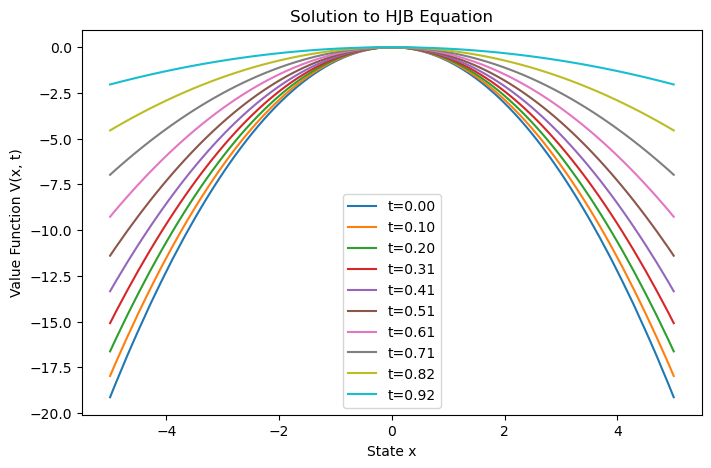

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
x_min, x_max = -5, 5  # State space range
T = 1.0  # Time horizon
Nx, Nt = 100, 50  # Grid points in x and t
dx = (x_max - x_min) / (Nx - 1)
dt = T / (Nt - 1)

# Create grids
x = np.linspace(x_min, x_max, Nx)
t = np.linspace(0, T, Nt)

# Initialize value function
V = np.zeros((Nt, Nx))

# Terminal condition: V(x, T) = 0 for all x
V[-1, :] = 0  

# Solve HJB using finite differences (backward in time)
for n in range(Nt - 2, -1, -1):  # Iterate backward in time
    dVdx = np.gradient(V[n + 1, :], dx)  # Approximate ∂V/∂x
    u_star = -0.5 * dVdx  # Optimal control
    H = x**2 - 0.25 * dVdx**2  # Hamiltonian
    V[n, :] = V[n + 1, :] - dt * H  # Update value function

# Plot results
plt.figure(figsize=(8, 5))
for i in range(0, Nt, Nt // 10):
    plt.plot(x, V[i, :], label=f"t={t[i]:.2f}")
plt.xlabel("State x")
plt.ylabel("Value Function V(x, t)")
plt.legend()
plt.title("Solution to HJB Equation")
plt.show()

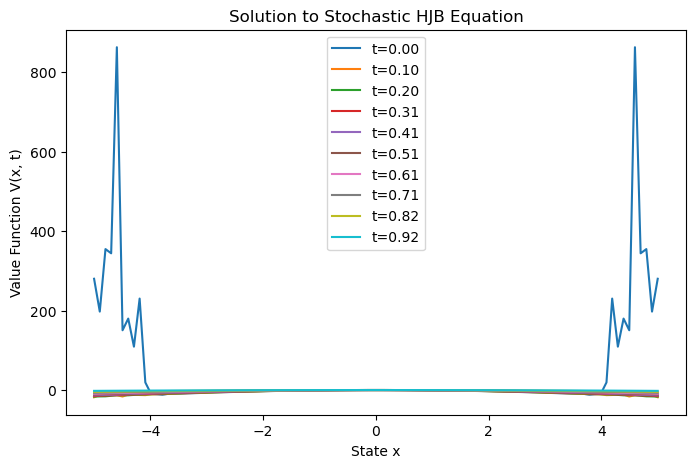

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
x_min, x_max = -5, 5  # State space range
T = 1.0  # Time horizon
Nx, Nt = 100, 50  # Grid points in x and t
dx = (x_max - x_min) / (Nx - 1)
dt = T / (Nt - 1)
sigma = 0.5  # Noise strength

# Create grids
x = np.linspace(x_min, x_max, Nx)
t = np.linspace(0, T, Nt)

# Initialize value function
V = np.zeros((Nt, Nx))

# Terminal condition: V(x, T) = 0 for all x
V[-1, :] = 0  

# Solve stochastic HJB using finite differences
for n in range(Nt - 2, -1, -1):  # Iterate backward in time
    dVdx = np.gradient(V[n + 1, :], dx)  # First derivative
    d2Vdx2 = np.gradient(dVdx, dx)  # Second derivative
    u_star = -0.5 * dVdx  # Optimal control
    H = x**2 - 0.25 * dVdx**2 + (sigma**2 / 2) * d2Vdx2  # HJB update
    V[n, :] = V[n + 1, :] - dt * H  # Explicit Euler step

# Plot results
plt.figure(figsize=(8, 5))
for i in range(0, Nt, Nt // 10):
    plt.plot(x, V[i, :], label=f"t={t[i]:.2f}")
plt.xlabel("State x")
plt.ylabel("Value Function V(x, t)")
plt.legend()
plt.title("Solution to Stochastic HJB Equation")
plt.show()


Epoch 0, Loss: 123.399231
Epoch 500, Loss: 0.011244
Epoch 1000, Loss: 0.528239
Epoch 1500, Loss: 0.000525
Epoch 2000, Loss: 0.018246
Epoch 2500, Loss: 0.000636
Epoch 3000, Loss: 0.122551
Epoch 3500, Loss: 0.001465
Epoch 4000, Loss: 0.000679
Epoch 4500, Loss: 0.011266


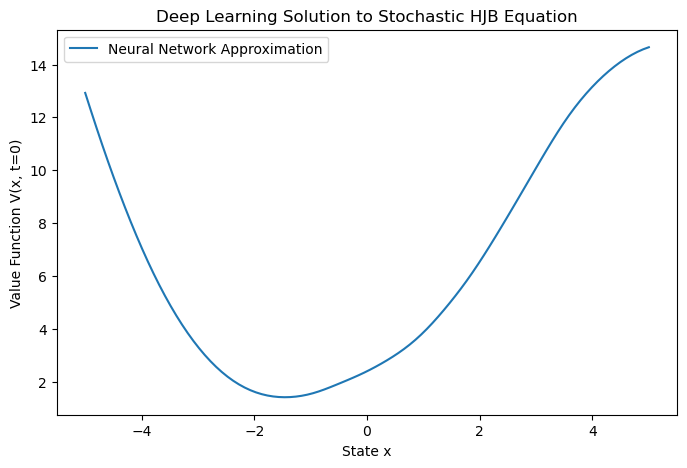

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Problem parameters
x_min, x_max = -5, 5  # State space range
T = 1.0  # Time horizon
sigma = 0.5  # Noise level

# Define the neural network
class HJBNet(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=50):
        super(HJBNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim), nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim), nn.Tanh(),
            nn.Linear(hidden_dim, 1)  # Output: V(x,t)
        )
    
    def forward(self, x, t):
        inputs = torch.cat((x, t), dim=1)  # Concatenate (x, t) as input
        return self.net(inputs)

# Define the loss function (PDE residual)
def loss_function(model, x, t):
    x.requires_grad = True
    t.requires_grad = True

    V = model(x, t)  # Forward pass
    V_t = torch.autograd.grad(V, t, torch.ones_like(V), create_graph=True)[0]
    V_x = torch.autograd.grad(V, x, torch.ones_like(V), create_graph=True)[0]
    V_xx = torch.autograd.grad(V_x, x, torch.ones_like(V_x), create_graph=True)[0]

    # Compute residual of the HJB PDE
    HJB_residual = V_t + x**2 - 0.25 * V_x**2 + (sigma**2 / 2) * V_xx
    loss = torch.mean(HJB_residual**2)  # MSE loss on PDE residuals
    return loss

# Train the model
def train(model, optimizer, epochs=5000, batch_size=1000):
    for epoch in range(epochs):
        x_train = torch.FloatTensor(batch_size, 1).uniform_(x_min, x_max).to(device)
        t_train = torch.FloatTensor(batch_size, 1).uniform_(0, T).to(device)
        
        optimizer.zero_grad()
        loss = loss_function(model, x_train, t_train)
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Initialize and train the model
model = HJBNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)

train(model, optimizer, epochs=5000)

# Evaluate the trained model
x_test = torch.linspace(x_min, x_max, 100).view(-1, 1).to(device)
t_test = torch.zeros_like(x_test)  # Compute V(x, 0)

V_pred = model(x_test, t_test).cpu().detach().numpy()

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(x_test.cpu().numpy(), V_pred, label="Neural Network Approximation")
plt.xlabel("State x")
plt.ylabel("Value Function V(x, t=0)")
plt.legend()
plt.title("Deep Learning Solution to Stochastic HJB Equation")
plt.show()


Epoch 0, Loss: 834.725037
Epoch 500, Loss: 1.529429
Epoch 1000, Loss: 4.270600
Epoch 1500, Loss: 1.616580
Epoch 2000, Loss: 2.256871
Epoch 2500, Loss: 0.784998
Epoch 3000, Loss: 0.898223
Epoch 3500, Loss: 5.742058
Epoch 4000, Loss: 1.057404
Epoch 4500, Loss: 0.523209


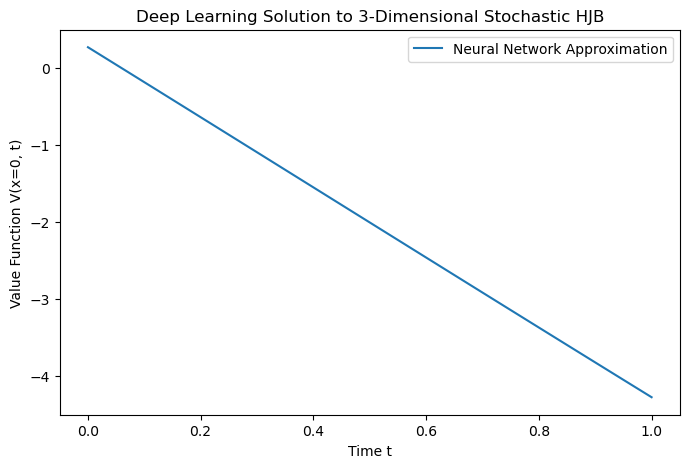

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Problem parameters
N = 3  # Number of state dimensions
T = 1.0  # Time horizon
sigma = 0.5 * torch.eye(N).to(device)  # Diffusion matrix (identity scaled)

# Define the neural network
class HJBNetND(nn.Module):
    def __init__(self, input_dim=N+1, hidden_dim=100):
        super(HJBNetND, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim), nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim), nn.Tanh(),
            nn.Linear(hidden_dim, 1)  # Output: V(x,t)
        )
    
    def forward(self, x, t):
        inputs = torch.cat((x, t), dim=1)  # Concatenate (x1, x2, ..., xN, t)
        return self.net(inputs)

# Define the loss function (PDE residual)
def loss_function(model, x, t):
    x.requires_grad = True
    t.requires_grad = True

    V = model(x, t)  # Forward pass
    V_t = torch.autograd.grad(V, t, torch.ones_like(V), create_graph=True)[0]
    grad_V = torch.autograd.grad(V, x, torch.ones_like(V), create_graph=True)[0]
    
    # Compute Hessian (second-order derivatives)
    H_V = torch.zeros_like(x)
    for i in range(N):
        dVdx_i = torch.autograd.grad(grad_V[:, i], x, torch.ones_like(grad_V[:, i]), create_graph=True)[0][:, i]
        H_V[:, i] = dVdx_i  # Diagonal of Hessian
    
    # Compute the trace term: Tr(sigma^T H_V sigma)
    trace_term = torch.sum(torch.matmul(sigma, H_V.T).T, dim=1)

    # Compute residual of the HJB PDE
    HJB_residual = V_t + torch.sum(x**2, dim=1) - 0.25 * torch.sum(grad_V**2, dim=1) + (0.5 * trace_term)
    loss = torch.mean(HJB_residual**2)  # MSE loss on PDE residuals
    return loss

# Train the model
def train(model, optimizer, epochs=5000, batch_size=1000):
    for epoch in range(epochs):
        x_train = torch.FloatTensor(batch_size, N).uniform_(-5, 5).to(device)
        t_train = torch.FloatTensor(batch_size, 1).uniform_(0, T).to(device)
        
        optimizer.zero_grad()
        loss = loss_function(model, x_train, t_train)
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Initialize and train the model
model = HJBNetND().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)

train(model, optimizer, epochs=5000)

# Evaluate the trained model
x_test = torch.zeros(100, N).to(device)  # Test at x=0
t_test = torch.linspace(0, T, 100).view(-1, 1).to(device)

V_pred = model(x_test, t_test).cpu().detach().numpy()

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(t_test.cpu().numpy(), V_pred, label="Neural Network Approximation")
plt.xlabel("Time t")
plt.ylabel("Value Function V(x=0, t)")
plt.legend()
plt.title(f"Deep Learning Solution to {N}-Dimensional Stochastic HJB")
plt.show()

In [7]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Portfolio environment
class PortfolioEnv(gym.Env):
    def __init__(self, N=3, T=1.0, r=0.02, mu=[0.05, 0.07, 0.06], sigma=[0.15, 0.2, 0.18]):
        super(PortfolioEnv, self).__init__()
        self.N, self.T, self.r = N, T, r
        self.mu = np.array(mu)
        self.sigma = np.array(sigma)
        self.dt = 0.01
        self.max_steps = int(self.T / self.dt)
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(N,))
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(N+1,))
    
    def reset(self):
        self.t, self.X = 0, 1.0  # Start at X=1.0
        return np.hstack([self.X, self.t])

    def step(self, action):
        u = np.clip(action, -1, 1)
        dX = (self.r * self.X + np.dot(u, self.mu - self.r)) * self.dt + np.dot(u, self.sigma) * np.sqrt(self.dt) * np.random.randn()
        self.X += dX
        self.t += self.dt
        reward = np.log(self.X) if self.t >= self.T else 0
        done = self.t >= self.T
        return np.hstack([self.X, self.t]), reward, done, {}

# Actor-Critic Networks
class Actor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Actor, self).__init__()
        self.fc = nn.Sequential(nn.Linear(input_dim, 64), nn.ReLU(),
                                nn.Linear(64, 64), nn.ReLU(),
                                nn.Linear(64, output_dim), nn.Tanh())
    def forward(self, state):
        return self.fc(state)

class Critic(nn.Module):
    def __init__(self, input_dim):
        super(Critic, self).__init__()
        self.fc = nn.Sequential(nn.Linear(input_dim, 64), nn.ReLU(),
                                nn.Linear(64, 64), nn.ReLU(),
                                nn.Linear(64, 1))
    def forward(self, state, action):
        return self.fc(torch.cat([state, action], dim=1))

# DDPG Agent
class DDPGAgent:
    def __init__(self, state_dim, action_dim, lr=0.001):
        self.actor = Actor(state_dim, action_dim).cuda()
        self.critic = Critic(state_dim + action_dim).cuda()
        self.target_actor = Actor(state_dim, action_dim).cuda()
        self.target_critic = Critic(state_dim + action_dim).cuda()
        self.actor_opt = optim.Adam(self.actor.parameters(), lr=lr)
        self.critic_opt = optim.Adam(self.critic.parameters(), lr=lr)
        self.gamma = 0.99
        self.tau = 0.005
        self.memory = []
    
    def select_action(self, state):
        state = torch.FloatTensor(state).unsqueeze(0).cuda()
        return self.actor(state).cpu().detach().numpy().flatten()
    
    def train(self, batch_size=64):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.FloatTensor(states).cuda()
        actions = torch.FloatTensor(actions).cuda()
        rewards = torch.FloatTensor(rewards).unsqueeze(1).cuda()
        next_states = torch.FloatTensor(next_states).cuda()
        dones = torch.FloatTensor(dones).unsqueeze(1).cuda()

        with torch.no_grad():
            next_actions = self.target_actor(next_states)
            target_q = rewards + self.gamma * (1 - dones) * self.target_critic(next_states, next_actions)

        critic_loss = nn.MSELoss()(self.critic(states, actions), target_q)
        self.critic_opt.zero_grad()
        critic_loss.backward()
        self.critic_opt.step()

        actor_loss = -self.critic(states, self.actor(states)).mean()
        self.actor_opt.zero_grad()
        actor_loss.backward()
        self.actor_opt.step()

        for param, target_param in zip(self.actor.parameters(), self.target_actor.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)
        for param, target_param in zip(self.critic.parameters(), self.target_critic.parameters()):
            target_param.data.copy_(self.tau * param.data + (1 - self.tau) * target_param.data)

# Train RL Agent
env = PortfolioEnv()
agent = DDPGAgent(env.observation_space.shape[0], env.action_space.shape[0])

for episode in range(1000):
    state = env.reset()
    episode_reward = 0
    for step in range(env.max_steps):
        action = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.memory.append((state, action, reward, next_state, done))
        agent.train()
        state = next_state
        episode_reward += reward
        if done:
            break
    if episode % 100 == 0:
        print(f"Episode {episode}, Reward: {episode_reward:.3f}")



AssertionError: Torch not compiled with CUDA enabled

In [6]:
pip install gym


     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
     - ----------------------------------- 30.7/721.7 kB 163.8 kB/s eta 0:00:05
     -- ---------------------------------- 41.0/721.7 kB 196.9 kB/s eta 0:00:04
     ---- -------------------------------- 92.2/721.7 kB 350.1 kB/s eta 0:00:02
     ---- -------------------------------- 92.2/721.7 kB 350.1 kB/s eta 0:00:02
     ----- ------------------------------ 112.6/721.7 kB 312.2 kB/s eta 0:00:02
     -------- --------------------------- 174.1/721.7 kB 436.9 kB/s eta 0:00:02
     ------------ ----------------------- 256.0/721.7 kB 562.4 kB/s eta 0:00:01
     --------------- -------------------- 317.4/721.7 kB 656.4 kB/s eta 0:00:01
     --------------------- -------------- 430.1/721.7 kB 790.7 kB/s eta 0:00:01
     -------------------------- --------- 532.5/721.7 kB 8

In [1]:
class CircularQueue:
    def __init__(self, size):
        self.size = size
        self.queue = [None] * size
        self.front = -1
        self.rear = -1

    def is_empty(self):
        return self.front == -1

    def is_full(self):
        return (self.rear == self.size - 1 and self.front == 0) or (self.rear == self.front - 1)

    def enqueue(self, item):
        if self.is_full():
            print("Queue is full")
            return
        if self.rear == self.size - 1:
            self.rear = 0
        else:
            self.rear += 1
        self.queue[self.rear] = item
        if self.front == -1:  # if this is the first element
            self.front = 0

    def dequeue(self):
        if self.is_empty():
            print("Queue is empty")
            return None
        item = self.queue[self.front]
        if self.front == self.rear:  # this is the last element
            self.front = self.rear = -1
        elif self.front == self.size - 1:
            self.front = 0
        else:
            self.front += 1
        return item

    def __str__(self):
        if self.is_empty():
            return "Queue is empty"
        if self.front <= self.rear:
            return str(self.queue[self.front:self.rear + 1])
        else:
            return str(self.queue[self.front:] + self.queue[:self.rear + 1])

# Example usage
cq = CircularQueue(5)
cq.enqueue(10)
cq.enqueue(20)
cq.enqueue(30)
print(cq)  # Output: [10, 20, 30]

print(cq.dequeue())  # Output: 10
print(cq)  # Output: [20, 30]

cq.enqueue(40)
cq.enqueue(50)
cq.enqueue(60)  # Output: Queue is full
print(cq)  # Output: [20, 30, 40, 50]

print(cq.dequeue())  # Output: 20
print(cq.dequeue())  # Output: 30
print(cq.dequeue())  # Output: 40
print(cq.dequeue())  # Output: 50
print(cq.dequeue())  # Output: Queue is empty


[10, 20, 30]
10
[20, 30]
[20, 30, 40, 50, 60]
20
30
40
50
60


# Password Generator

In [2]:
import random
import string

def generate_password(length=12):
    # Define character sets
    lowercase = string.ascii_lowercase
    uppercase = string.ascii_uppercase
    digits = string.digits
    special_chars = string.punctuation

    # Combine all characters
    all_chars = lowercase + uppercase + digits + special_chars

    # Ensure the password includes at least one character from each set
    password = [
        random.choice(lowercase),
        random.choice(uppercase),
        random.choice(digits),
        random.choice(special_chars)
    ]

    # Fill the rest of the password with random choices
    for _ in range(length - 4):
        password.append(random.choice(all_chars))

    # Shuffle the password to avoid predictable patterns
    random.shuffle(password)

    # Convert the list to a string
    return ''.join(password)

# Example usage
password = generate_password(16)
print("Generated Password:", password)

Generated Password: z<4DcWFE4ffb6|AW


In [4]:
import cv2
import os
import string

img = cv2.imread("pic.png")
    
msg = input("Enter secret message: ")
password = input("Enter a passcode: ")
combinedTxt = msg+"::"+password

d = {}
c = {}

for i in range(255):
    d[chr(i)] = i
    c[i] = chr(i)

m = 0
n = 0
z = 0

for i in range(len(combinedTxt)):
    img[n, m, z] = d[combinedTxt[i]]
    n = n + 1
    m = m + 1
    z = (z + 1) % 3

cv2.imwrite("encryptedImage.jpg", img)
os.system("start encryptedImage.jpg")

message = ""
n = 0
m = 0
z = 0

pas = input("Enter passcode for Decryption: ")
if password == pas:
    for i in range(len(msg)):
        message = message + c[img[n, m, z]]
        n = n + 1
        m = m + 1
        z = (z + 1) % 3
    print("Decrypted message: ", message)
else:
    print("You're not an Authorized User")


Enter secret message:  ibj
Enter a passcode:  5


TypeError: 'NoneType' object does not support item assignment

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [6]:
base_dir = '/kaggle/input/fruit-and-vegetable-image-recognition'

In [7]:
train_path = os.path.join(base_dir, 'train')
test_path = os.path.join(base_dir, 'test')
validation_path = os.path.join(base_dir, 'validation')

In [8]:
categories = sorted(os.listdir(train_path))

# Initialize list for sample images
sample_images = []
for category in categories:
    category_path = os.path.join(train_path, category) 
    first_image = os.listdir(category_path)[0] 
    sample_images.append(os.path.join(category_path, first_image))

# (6x6) grid to plot the images
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(12, 10))

for ax, img_path, label in zip(axes.flat, sample_images, categories):
    ax.imshow(plt.imread(img_path)) 
    ax.set_title(label, fontsize=10)

# Adjust layout
plt.tight_layout(pad=2)
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/fruit-and-vegetable-image-recognition\\train'

In [10]:
# Get the list of all subdirectories (categories/classes)
classes = sorted(os.listdir(train_path))  # Sorting for consistency in display

# Count the number of images in each class
image_count = {}
for cls in classes:
    class_path = os.path.join(train_path, cls)
    image_count[cls] = len(os.listdir(class_path))

# Create a bar plot for image counts
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='red')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Training Data' , fontsize=25, fontweight='bold')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.tight_layout()  # Ensure everything fits
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/fruit-and-vegetable-image-recognition\\train'

In [11]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               image_size=(224, 224),
                                                              batch_size=32,
                                                                    seed=42)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(validation_path,
                                                              image_size=(224, 224),
                                                              batch_size=32,
                                                                 seed = 42)

NotFoundError: Could not find directory /kaggle/input/fruit-and-vegetable-image-recognition\train

In [12]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the base model
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)  
output = Dense(36, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 224, 224, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 224, 224, 3)       │               7 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 40)      │           1,080 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 40)      │             160 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 40)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 40)      │             360 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 40)      │             160 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 40)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 40)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 40)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 10)          │             410 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 40)          │             440 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 11,186,259 (42.67 MB)

 Trainable params: 402,724 (1.54 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [13]:
callbacks = [
    EarlyStopping(
        monitor="val_loss",        # Monitor validation loss
        patience=5,               # Stop after 5 epochs without improvement
        restore_best_weights=True # Restore the best model weights
    )
]

In [14]:
history = model.fit(
    train_dataset,             
    epochs=10,                
    validation_data=val_dataset,
    callbacks=callbacks,       
    # class_weight=class_weights,
    verbose=1                   
)

NameError: name 'train_dataset' is not defined

In [15]:
# Plot training & validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [16]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,  # Path to the test dataset
    image_size=(224, 224),
    batch_size=32,
    seed=42
)

NotFoundError: Could not find directory /kaggle/input/fruit-and-vegetable-image-recognition\test

In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the test accuracy and loss
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

NameError: name 'test_dataset' is not defined

In [18]:
model.save('efficient_model.h5')

In [19]:
import sys
import matplotlib
import sklearn

# Print Python version
print(f"Python Version: {sys.version}")

# Print library versions
print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"TensorFlow Version: {tf.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")

Python Version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
NumPy Version: 1.26.4
Pandas Version: 2.1.4
Matplotlib Version: 3.8.0
TensorFlow Version: 2.17.0
Scikit-learn Version: 1.2.2


In [12]:
class_labels = train_dataset.class_names
print(class_labels)


NameError: name 'train_dataset' is not defined

# Recursion

In [21]:
def summation(A,start,end):
    if(start==end):
        return A[start]
    else:
        if start==end-1:
            return A[start]+A[end]
        else:
            mid=start+(end-start)/2
            left_sum=summation(A,start,end)
            right_sum=summation(A,mid+1,end)
            return left_sum+right_sum

A=[3,4,2,1,5,8,7,6]
print(summation(A, 0, len(A) - 1))

RecursionError: maximum recursion depth exceeded

In [25]:
# Iterative Binary Search Algorithm
def check_for_magic_index(A):
    low=0
    high=len(A)-1
    while low<=high:
        mid=(low+high)//2
        if mid==A[mid]:
            return mid
        elif A[mid]>mid:
            high=mid-1
        else:
            low=mid+1
        return -1

A=[-1,0,2,5,7,9,11,12,19]
print check_for_magic_index(A)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3784996009.py, line 16)

In [8]:
def match_nuts_bolts(nuts,bolts):
    for i in range(len(nuts)):
        for j in range(len(bolts)):
            if nuts[i]==bolts[j]:
                print "Nut",nuts[i],"matches with bolt",bolts[j]

nuts=['@','#','$','%','^','&']
bolts=['$','%','&','^','@','#']
match_nuts_bolts(nuts,bolts)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (208411805.py, line 5)